In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from catboost import CatBoostRegressor

import main

In [7]:
## Start of Notebook

print('Starting Assignment 1')
RawData = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(RawData.shape)
print(RawData.describe())


Starting Assignment 1
(111993, 12)
            Instance  Year of Record            Age  Size of City  \
count  111993.000000   111552.000000  111499.000000  1.119930e+05   
mean    55997.000000     1999.421274      37.345304  8.388538e+05   
std     32329.738686       11.576382      16.036694  2.196879e+06   
min         1.000000     1980.000000      14.000000  7.700000e+01   
25%     27999.000000     1989.000000      24.000000  7.273400e+04   
50%     55997.000000     1999.000000      35.000000  5.060920e+05   
75%     83995.000000     2009.000000      48.000000  1.184501e+06   
max    111993.000000     2019.000000     115.000000  4.999251e+07   

       Wears Glasses  Body Height [cm]  Income in EUR  
count  111993.000000     111993.000000   1.119930e+05  
mean        0.500531        175.220192   1.092138e+05  
std         0.500002         19.913889   1.498024e+05  
min         0.000000         94.000000  -5.696906e+03  
25%         0.000000        160.000000   3.077169e+04  
50%    

In [8]:
## Dropping Features that are missing a large amount of data
## Dropping instances with missing data

RawData = main.HandleMissingData(RawData)

null_counts = RawData.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

37
1999.4212743832472
Number of null values in each column:
Year of Record       0
Gender               0
Age                  0
Country              0
Size of City         0
Profession           0
University Degree    0
Wears Glasses        0
Body Height [cm]     0
Income in EUR        0
dtype: int64


In [9]:
RawData['University Degree'] = RawData['University Degree'].replace(['0'], 'No')


In [6]:
## Scale data
columns = RawData.columns.values
RawData= RawData.drop(columns=['Country','Profession','Gender','University Degree'], axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(RawData)
rescaledData = scaler.transform(RawData)

## Holded scaled for later.
df = pd.DataFrame(rescaledData)
print(df)

               0         1         2    3         4         5
0       0.435897  0.267327  0.024801  0.0  0.578947  0.012612
1       0.410256  0.267327  0.032073  0.0  0.538012  0.018276
2       0.974359  0.138614  0.025963  1.0  0.444444  0.030936
3       0.666667  0.188119  0.015039  1.0  0.450292  0.009770
4       0.769231  0.316832  0.001907  0.0  0.549708  0.008263
5       0.282051  0.455446  0.001120  0.0  0.508772  0.024855
6       0.051282  0.564356  0.024106  0.0  0.467836  0.029487
7       0.717949  0.217822  0.000627  0.0  0.561404  0.003316
8       0.897436  0.287129  0.001705  0.0  0.555556  0.010160
9       1.000000  0.019802  0.026510  1.0  0.368421  0.018265
10      0.025641  0.366337  0.047253  1.0  0.666667  0.006279
11      0.230769  0.009901  0.020810  0.0  0.567251  0.005639
12      0.435897  0.079208  0.041822  1.0  0.608187  0.012378
13      0.435897  0.178218  0.001324  1.0  0.514620  0.002330
14      0.589744  0.257426  0.036703  0.0  0.415205  0.008123
15      

/users/ugrad/teoc/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
## Removing Outliers. Outliers being top and bottoms 2.5%

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(RawData['Income in EUR']))
print(z)
print(z.shape)
count = []
index = []
for i in range(len(z)):
    if z[i] > 3:
        count.append(z[i])
        index.append(i)
        
RawData = RawData.drop(index)
print("Removing " + str(len(index)))
print("New Number of Instances: " + str(RawData.shape))

[0.32163766 0.12157727 0.32555287 ... 1.20651194 0.06119611 0.24480686]
(111993,)
Removing 2399
New Number of Instances: (109594, 10)


In [10]:
## Seeing the data and the unique values

for s in RawData.columns.values:
    print("Features in " + s)
    print(RawData[s].unique())
    print(len(RawData[s].unique()))


Features in Year of Record
[1997. 1996. 2018. 2006. 2010. 1991. 1982. 2008. 2015. 2019. 1981. 1989.
 2003. 1987. 1995. 1992. 1980. 1983. 2011. 2014. 1985. 2005. 1998. 2001.
 2017. 2007. 1988. 1994. 2012. 2009. 2013. 2004. 1999. 2002. 1993. 2000.
 1990. 2016. 1986. 1984.]
40
Features in Gender
['0' 'other' 'female' 'male' 'unknown']
5
Features in Age
[ 41.  28.  33.  46.  60.  71.  36.  43.  16.  51.  15.  22.  32.  40.
  31.  27.  25.  35.  63.  38.  34.  20.  23.  14.  37.  62.  52.  47.
  24.  26.  50.  49.  18.  19.  39.  66.  21.  44.  29.  64.  65.  53.
  78.  42.  58.  17.  30.  79.  48.  56.  83.  54.  74.  87.  90.  67.
  45.  77.  73.  55.  92.  80.  72.  57.  70.  59.  61.  82.  69.  98.
  94.  68.  81.  97.  76.  75.  88.  91.  96.  84.  89. 107.  85.  86.
 100. 110.  95.  99.  93. 104. 102. 101. 105. 111. 108. 103. 109. 106.
 115.]
99
Features in Country
['Belarus' 'Singapore' 'Norway' 'Cuba' 'United Arab Emirates' 'Liberia'
 'State of Palestine' 'Israel' 'South Sudan' 'Kyr

In [11]:
## Section to conver to binary matrix
## Changing Country, Profession

RawData_Country = pd.get_dummies(RawData.Country)
print(type(RawData_Country))
RawData_Profession = pd.get_dummies(RawData.Profession)
print(type(RawData_Profession))
RawData_Gender = pd.get_dummies(RawData['Gender'])
print(RawData_Gender.describe())
RawData_Uni = pd.get_dummies(RawData['University Degree'])
print(RawData_Uni.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
                   0         female           male          other  \
count  111993.000000  111993.000000  111993.000000  111993.000000   
mean        0.006465       0.242604       0.381792       0.241622   
std         0.080143       0.428660       0.485828       0.428068   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             unknown  
count  111993.000000  
mean        0.127517  
std         0.333553  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
            Bachelor         Master             No            PhD
count  111993.000000  111993.

In [50]:
RawData.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111993.000000,111993.000000,1.119930e+05,111993.000000,111993.000000,1.119930e+05
mean,1999.419616,37.343780,8.388538e+05,0.500531,175.220192,1.092138e+05
std,11.553597,16.001302,2.196879e+06,0.500002,19.913889,1.498024e+05
min,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03
25%,1989.000000,24.000000,7.273400e+04,0.000000,160.000000,3.077169e+04
50%,1999.000000,35.000000,5.060920e+05,1.000000,174.000000,5.733917e+04
75%,2009.000000,48.000000,1.184501e+06,1.000000,190.000000,1.260936e+05
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06


In [12]:
## Creating clean training data
print(RawData.columns)

RawData = pd.concat([RawData, RawData_Country], axis=1)
RawData= RawData.drop('Country', axis=1)
RawData = pd.concat([RawData, RawData_Profession], axis=1)
RawData= RawData.drop('Profession', axis=1)
RawData = pd.concat([RawData, RawData_Gender], axis=1)
RawData= RawData.drop('Gender', axis=1)
RawData = pd.concat([RawData, RawData_Uni], axis=1)
RawData= RawData.drop('University Degree', axis=1)

Index([u'Year of Record', u'Gender', u'Age', u'Country', u'Size of City',
       u'Profession', u'University Degree', u'Wears Glasses',
       u'Body Height [cm]', u'Income in EUR'],
      dtype='object')


In [13]:
RawData.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,Angola,...,youth initiatives lead advisor,0,female,male,other,unknown,Bachelor,Master,No,PhD
count,111993.000000,111993.000000,1.119930e+05,111993.000000,111993.000000,1.119930e+05,111993.000000,111993.000000,111993.000000,111993.000000,...,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000
mean,1999.419616,37.343780,8.388538e+05,0.500531,175.220192,1.092138e+05,0.000196,0.003554,0.000063,0.000473,...,0.000286,0.006465,0.242604,0.381792,0.241622,0.127517,0.385488,0.240560,0.313046,0.060906
std,11.553597,16.001302,2.196879e+06,0.500002,19.913889,1.498024e+05,0.014014,0.059508,0.007906,0.021749,...,0.016901,0.080143,0.428660,0.485828,0.428068,0.333553,0.486713,0.427425,0.463735,0.239158
min,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,-5.696906e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,24.000000,7.273400e+04,0.000000,160.000000,3.077169e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,35.000000,5.060920e+05,1.000000,174.000000,5.733917e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,48.000000,1.184501e+06,1.000000,190.000000,1.260936e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,5.285252e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
RawData['Year of Record'] = df[0]
RawData['Age'] = df[1]
RawData['Size of City'] = df[2]
RawData['Body Height [cm]'] = df[4]

RawData.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,Angola,...,youth initiatives lead advisor,0,female,male,other,unknown,Bachelor,Master,No,PhD
count,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,1.119930e+05,111993.000000,111993.000000,111993.000000,111993.000000,...,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000,111993.000000
mean,0.497939,0.231127,0.016778,0.500531,0.474972,1.092138e+05,0.000196,0.003554,0.000063,0.000473,...,0.000286,0.006465,0.242604,0.381792,0.241622,0.127517,0.385488,0.240560,0.313046,0.060906
std,0.296246,0.158429,0.043944,0.500002,0.116455,1.498024e+05,0.014014,0.059508,0.007906,0.021749,...,0.016901,0.080143,0.428660,0.485828,0.428068,0.333553,0.486713,0.427425,0.463735,0.239158
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.696906e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.099010,0.001453,0.000000,0.385965,3.077169e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.487179,0.207921,0.010122,1.000000,0.467836,5.733917e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.743590,0.336634,0.023692,1.000000,0.561404,1.260936e+05,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.285252e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
RawData.head(10)

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR,Afghanistan,Albania,Algeria,Angola,...,youth initiatives lead advisor,0,female,male,other,unknown,Bachelor,Master,No,PhD
0,0.435897,0.267327,0.024801,0,0.578947,61031.94416,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.410256,0.267327,0.032073,0,0.538012,91001.32764,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.974359,0.138614,0.025963,1,0.444444,157982.17670,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.666667,0.188119,0.015039,1,0.450292,45993.75793,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.769231,0.316832,0.001907,0,0.549708,38022.16217,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0.282051,0.455446,0.001120,0,0.508772,125809.99030,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,0.051282,0.564356,0.024106,0,0.467836,150319.42260,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.717949,0.217822,0.000627,0,0.561404,11849.02876,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0.897436,0.287129,0.001705,0,0.555556,48058.20607,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,1.000000,0.019802,0.026510,1,0.368421,90940.68912,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [16]:
## Output Training Data to new file
RawData.to_csv("../data/processedData_ubuntu_3.csv", index=False)

In [17]:
## Read in new data and model

CleanData = main.ReadInData("../data/processedData_ubuntu_3.csv")

In [18]:
CleanData.columns.unique

<bound method Index.unique of Index([u'Year of Record', u'Age', u'Size of City', u'Wears Glasses',
       u'Body Height [cm]', u'Income in EUR', u'Afghanistan', u'Albania',
       u'Algeria', u'Angola',
       ...
       u'youth initiatives lead advisor', u'0', u'female', u'male', u'other',
       u'unknown', u'Bachelor', u'Master', u'No', u'PhD'],
      dtype='object', length=1516)>

In [19]:
income = CleanData['Income in EUR']
# features = CleanData.drop(labels=['Income in EUR', 'Wears Glasses', 'Body Height [cm]'], axis=1)
features = CleanData.drop(labels=['Income in EUR'], axis=1)

features.head(5)

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Afghanistan,Albania,Algeria,Angola,Argentina,...,youth initiatives lead advisor,0,female,male,other,unknown,Bachelor,Master,No,PhD
0,0.435897,0.267327,0.024801,0,0.578947,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.410256,0.267327,0.032073,0,0.538012,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.974359,0.138614,0.025963,1,0.444444,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.666667,0.188119,0.015039,1,0.450292,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.769231,0.316832,0.001907,0,0.549708,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
count = 0
columnsToDrop = []
for i in range(5,features.shape[1] - 1):
    seriesAt = features.iloc[:,i].value_counts()
    posForSeries = seriesAt[1]
    if posForSeries < 5:
#         print(seriesAt.name)
        columnsToDrop.append(seriesAt.name)
        count = count + 1
        
print(len(columnsToDrop))

216


In [21]:
features = features.drop(columns=columnsToDrop)
print(features.head(5))

   Year of Record       Age  Size of City  Wears Glasses  Body Height [cm]  \
0        0.435897  0.267327      0.024801              0          0.578947   
1        0.410256  0.267327      0.032073              0          0.538012   
2        0.974359  0.138614      0.025963              1          0.444444   
3        0.666667  0.188119      0.015039              1          0.450292   
4        0.769231  0.316832      0.001907              0          0.549708   

   Afghanistan  Albania  Algeria  Angola  Argentina  ...  \
0            0        0        0       0          0  ...   
1            0        0        0       0          0  ...   
2            0        0        0       0          0  ...   
3            0        0        0       0          0  ...   
4            0        0        0       0          0  ...   

   youth initiatives lead advisor  0  female  male  other  unknown  Bachelor  \
0                               0  1       0     0      0        0         1   
1         

In [22]:
## Splitting Data

features_train, features_val, income_train, income_val = train_test_split(features, income, test_size=0.2, random_state=0)


In [23]:
## Using Linear Regression

model = LinearRegression()
model.fit(features_train, income_train)

print(model.coef_)
print(model.intercept_)

## Using Ridge Regression 
rig_model = RidgeCV()
rig_model.fit(features_train, income_train)

print(rig_model.coef_)
print(rig_model.intercept_)

# Using Random Forest Regression
# RFR = RandomForestRegressor(max_depth=200)
# RFR.fit(features_train, income_train)

# Using CatBoost
cat_model = CatBoostRegressor(iterations=20000)
cat_model.fit(features_train, income_train)


[8.32987421e+04 1.75564952e+05 5.93086084e+04 ... 6.63289660e+17
 6.63289660e+17 6.63289660e+17]
-6.585847105693088e+17
[ 83308.13280187 175177.09573212  60044.48855457 ...   4155.80752185
 -13911.59842763  14338.46544822]
814549.9463147672
0:	learn: 149551.5147674	total: 53ms	remaining: 17m 38s
1:	learn: 149249.1974846	total: 60.5ms	remaining: 10m 4s
2:	learn: 148935.5305810	total: 67.9ms	remaining: 7m 32s
3:	learn: 148656.8767656	total: 75.4ms	remaining: 6m 17s
4:	learn: 148369.3991899	total: 82.6ms	remaining: 5m 30s
5:	learn: 148094.1732165	total: 90ms	remaining: 4m 59s
6:	learn: 147883.4128677	total: 97.6ms	remaining: 4m 38s
7:	learn: 147606.0436372	total: 106ms	remaining: 4m 24s
8:	learn: 147332.7355109	total: 114ms	remaining: 4m 13s
9:	learn: 147054.6167089	total: 122ms	remaining: 4m 2s
10:	learn: 146820.0733337	total: 129ms	remaining: 3m 54s
11:	learn: 146573.9388359	total: 136ms	remaining: 3m 47s
12:	learn: 146340.3130136	total: 144ms	remaining: 3m 41s
13:	learn: 146133.8495291

161:	learn: 126439.6556135	total: 1.05s	remaining: 2m 8s
162:	learn: 126340.9923446	total: 1.05s	remaining: 2m 8s
163:	learn: 126209.2669713	total: 1.06s	remaining: 2m 8s
164:	learn: 126128.6163288	total: 1.07s	remaining: 2m 8s
165:	learn: 126065.7449612	total: 1.08s	remaining: 2m 8s
166:	learn: 125980.7846408	total: 1.08s	remaining: 2m 8s
167:	learn: 125927.7667924	total: 1.09s	remaining: 2m 8s
168:	learn: 125836.5673735	total: 1.09s	remaining: 2m 8s
169:	learn: 125705.6496217	total: 1.1s	remaining: 2m 8s
170:	learn: 125657.9481580	total: 1.11s	remaining: 2m 8s
171:	learn: 125527.5707295	total: 1.11s	remaining: 2m 8s
172:	learn: 125440.8248630	total: 1.12s	remaining: 2m 8s
173:	learn: 125353.8688966	total: 1.12s	remaining: 2m 8s
174:	learn: 125268.5248527	total: 1.13s	remaining: 2m 7s
175:	learn: 125153.4172166	total: 1.14s	remaining: 2m 7s
176:	learn: 125073.6253436	total: 1.14s	remaining: 2m 7s
177:	learn: 124966.8492562	total: 1.15s	remaining: 2m 7s
178:	learn: 124912.8911461	total

333:	learn: 112684.8109360	total: 2.05s	remaining: 2m
334:	learn: 112608.4922206	total: 2.06s	remaining: 2m 1s
335:	learn: 112532.2453105	total: 2.07s	remaining: 2m 1s
336:	learn: 112469.9335675	total: 2.07s	remaining: 2m 1s
337:	learn: 112435.8039223	total: 2.08s	remaining: 2m 1s
338:	learn: 112370.6353818	total: 2.09s	remaining: 2m 1s
339:	learn: 112306.3925964	total: 2.09s	remaining: 2m
340:	learn: 112258.3622138	total: 2.1s	remaining: 2m
341:	learn: 112208.8351880	total: 2.1s	remaining: 2m
342:	learn: 112162.2304688	total: 2.11s	remaining: 2m
343:	learn: 112112.2785751	total: 2.11s	remaining: 2m
344:	learn: 112044.4970190	total: 2.12s	remaining: 2m
345:	learn: 112007.2877582	total: 2.13s	remaining: 2m
346:	learn: 111943.7407188	total: 2.13s	remaining: 2m
347:	learn: 111875.3255727	total: 2.14s	remaining: 2m
348:	learn: 111837.4895608	total: 2.14s	remaining: 2m
349:	learn: 111766.1923721	total: 2.15s	remaining: 2m
350:	learn: 111717.2614826	total: 2.15s	remaining: 2m
351:	learn: 111

507:	learn: 103259.6856403	total: 3.05s	remaining: 1m 57s
508:	learn: 103203.9015531	total: 3.06s	remaining: 1m 57s
509:	learn: 103159.2508019	total: 3.07s	remaining: 1m 57s
510:	learn: 103101.5348949	total: 3.07s	remaining: 1m 57s
511:	learn: 103046.5986144	total: 3.08s	remaining: 1m 57s
512:	learn: 103004.3696449	total: 3.08s	remaining: 1m 57s
513:	learn: 102964.2920875	total: 3.09s	remaining: 1m 57s
514:	learn: 102888.5961019	total: 3.1s	remaining: 1m 57s
515:	learn: 102842.2746186	total: 3.1s	remaining: 1m 57s
516:	learn: 102795.4218253	total: 3.11s	remaining: 1m 57s
517:	learn: 102743.3919343	total: 3.11s	remaining: 1m 57s
518:	learn: 102691.7406382	total: 3.12s	remaining: 1m 57s
519:	learn: 102651.6091494	total: 3.12s	remaining: 1m 57s
520:	learn: 102601.8920572	total: 3.13s	remaining: 1m 57s
521:	learn: 102533.2935887	total: 3.13s	remaining: 1m 57s
522:	learn: 102465.0772492	total: 3.14s	remaining: 1m 56s
523:	learn: 102435.5966974	total: 3.15s	remaining: 1m 56s
524:	learn: 1024

679:	learn: 96182.4086954	total: 4.06s	remaining: 1m 55s
680:	learn: 96138.4517225	total: 4.07s	remaining: 1m 55s
681:	learn: 96108.7383547	total: 4.07s	remaining: 1m 55s
682:	learn: 96071.7190179	total: 4.08s	remaining: 1m 55s
683:	learn: 96024.0777373	total: 4.08s	remaining: 1m 55s
684:	learn: 95992.8865914	total: 4.09s	remaining: 1m 55s
685:	learn: 95953.9524925	total: 4.1s	remaining: 1m 55s
686:	learn: 95921.8486597	total: 4.1s	remaining: 1m 55s
687:	learn: 95903.6550582	total: 4.11s	remaining: 1m 55s
688:	learn: 95880.1985097	total: 4.11s	remaining: 1m 55s
689:	learn: 95841.0277012	total: 4.12s	remaining: 1m 55s
690:	learn: 95799.2225193	total: 4.13s	remaining: 1m 55s
691:	learn: 95754.2023910	total: 4.13s	remaining: 1m 55s
692:	learn: 95728.5701501	total: 4.14s	remaining: 1m 55s
693:	learn: 95702.8754670	total: 4.14s	remaining: 1m 55s
694:	learn: 95675.0782362	total: 4.15s	remaining: 1m 55s
695:	learn: 95652.8533429	total: 4.15s	remaining: 1m 55s
696:	learn: 95620.3474319	total: 

851:	learn: 90961.8451033	total: 5.06s	remaining: 1m 53s
852:	learn: 90940.8100818	total: 5.07s	remaining: 1m 53s
853:	learn: 90899.8874140	total: 5.07s	remaining: 1m 53s
854:	learn: 90881.5485677	total: 5.08s	remaining: 1m 53s
855:	learn: 90838.6217919	total: 5.08s	remaining: 1m 53s
856:	learn: 90814.3975739	total: 5.09s	remaining: 1m 53s
857:	learn: 90778.6808821	total: 5.1s	remaining: 1m 53s
858:	learn: 90761.6121167	total: 5.1s	remaining: 1m 53s
859:	learn: 90743.5075080	total: 5.11s	remaining: 1m 53s
860:	learn: 90713.6480770	total: 5.11s	remaining: 1m 53s
861:	learn: 90684.5205509	total: 5.12s	remaining: 1m 53s
862:	learn: 90669.5842097	total: 5.12s	remaining: 1m 53s
863:	learn: 90645.9382649	total: 5.13s	remaining: 1m 53s
864:	learn: 90617.4494695	total: 5.14s	remaining: 1m 53s
865:	learn: 90602.7156059	total: 5.14s	remaining: 1m 53s
866:	learn: 90578.3580430	total: 5.15s	remaining: 1m 53s
867:	learn: 90526.9694259	total: 5.15s	remaining: 1m 53s
868:	learn: 90496.4050307	total: 

1023:	learn: 86916.4318683	total: 6.06s	remaining: 1m 52s
1024:	learn: 86904.3487142	total: 6.07s	remaining: 1m 52s
1025:	learn: 86872.5693210	total: 6.08s	remaining: 1m 52s
1026:	learn: 86851.4740207	total: 6.08s	remaining: 1m 52s
1027:	learn: 86834.7527132	total: 6.09s	remaining: 1m 52s
1028:	learn: 86814.7228765	total: 6.09s	remaining: 1m 52s
1029:	learn: 86794.8495499	total: 6.1s	remaining: 1m 52s
1030:	learn: 86775.9010615	total: 6.1s	remaining: 1m 52s
1031:	learn: 86744.0301265	total: 6.11s	remaining: 1m 52s
1032:	learn: 86716.5894206	total: 6.12s	remaining: 1m 52s
1033:	learn: 86702.7336017	total: 6.12s	remaining: 1m 52s
1034:	learn: 86683.7773843	total: 6.13s	remaining: 1m 52s
1035:	learn: 86650.4750655	total: 6.13s	remaining: 1m 52s
1036:	learn: 86641.6541073	total: 6.14s	remaining: 1m 52s
1037:	learn: 86617.9091852	total: 6.14s	remaining: 1m 52s
1038:	learn: 86596.0818835	total: 6.15s	remaining: 1m 52s
1039:	learn: 86569.4157153	total: 6.16s	remaining: 1m 52s
1040:	learn: 865

1195:	learn: 83788.7175335	total: 7.07s	remaining: 1m 51s
1196:	learn: 83772.8982199	total: 7.08s	remaining: 1m 51s
1197:	learn: 83754.7051194	total: 7.09s	remaining: 1m 51s
1198:	learn: 83737.5540133	total: 7.09s	remaining: 1m 51s
1199:	learn: 83715.4124397	total: 7.1s	remaining: 1m 51s
1200:	learn: 83675.8299264	total: 7.11s	remaining: 1m 51s
1201:	learn: 83648.3672360	total: 7.11s	remaining: 1m 51s
1202:	learn: 83636.2440454	total: 7.12s	remaining: 1m 51s
1203:	learn: 83618.1437609	total: 7.12s	remaining: 1m 51s
1204:	learn: 83607.9179314	total: 7.13s	remaining: 1m 51s
1205:	learn: 83591.0148611	total: 7.13s	remaining: 1m 51s
1206:	learn: 83580.4472956	total: 7.14s	remaining: 1m 51s
1207:	learn: 83568.3021041	total: 7.14s	remaining: 1m 51s
1208:	learn: 83555.3494228	total: 7.15s	remaining: 1m 51s
1209:	learn: 83538.5127827	total: 7.16s	remaining: 1m 51s
1210:	learn: 83508.1876084	total: 7.16s	remaining: 1m 51s
1211:	learn: 83484.5844887	total: 7.17s	remaining: 1m 51s
1212:	learn: 83

1365:	learn: 81196.0138176	total: 8.08s	remaining: 1m 50s
1366:	learn: 81177.5162155	total: 8.09s	remaining: 1m 50s
1367:	learn: 81168.6493844	total: 8.09s	remaining: 1m 50s
1368:	learn: 81155.9504437	total: 8.1s	remaining: 1m 50s
1369:	learn: 81140.6408879	total: 8.1s	remaining: 1m 50s
1370:	learn: 81129.0730331	total: 8.11s	remaining: 1m 50s
1371:	learn: 81120.6795929	total: 8.11s	remaining: 1m 50s
1372:	learn: 81112.3034039	total: 8.12s	remaining: 1m 50s
1373:	learn: 81100.6510487	total: 8.13s	remaining: 1m 50s
1374:	learn: 81084.4719560	total: 8.13s	remaining: 1m 50s
1375:	learn: 81065.2011863	total: 8.14s	remaining: 1m 50s
1376:	learn: 81055.5871242	total: 8.14s	remaining: 1m 50s
1377:	learn: 81048.2339744	total: 8.15s	remaining: 1m 50s
1378:	learn: 81038.1768192	total: 8.15s	remaining: 1m 50s
1379:	learn: 81028.6517751	total: 8.16s	remaining: 1m 50s
1380:	learn: 81021.3119513	total: 8.16s	remaining: 1m 50s
1381:	learn: 81013.9178514	total: 8.17s	remaining: 1m 50s
1382:	learn: 810

1537:	learn: 78965.7800577	total: 9.08s	remaining: 1m 49s
1538:	learn: 78956.5546000	total: 9.09s	remaining: 1m 49s
1539:	learn: 78934.3589084	total: 9.1s	remaining: 1m 49s
1540:	learn: 78927.4371065	total: 9.1s	remaining: 1m 49s
1541:	learn: 78913.4519608	total: 9.11s	remaining: 1m 49s
1542:	learn: 78893.7627017	total: 9.11s	remaining: 1m 49s
1543:	learn: 78880.8241764	total: 9.12s	remaining: 1m 49s
1544:	learn: 78870.6624675	total: 9.13s	remaining: 1m 49s
1545:	learn: 78855.0295336	total: 9.13s	remaining: 1m 48s
1546:	learn: 78848.5079381	total: 9.14s	remaining: 1m 48s
1547:	learn: 78836.8058696	total: 9.14s	remaining: 1m 48s
1548:	learn: 78827.6784593	total: 9.15s	remaining: 1m 48s
1549:	learn: 78807.0793725	total: 9.15s	remaining: 1m 48s
1550:	learn: 78798.2095083	total: 9.16s	remaining: 1m 48s
1551:	learn: 78786.9029831	total: 9.16s	remaining: 1m 48s
1552:	learn: 78774.8886603	total: 9.17s	remaining: 1m 48s
1553:	learn: 78765.9928825	total: 9.18s	remaining: 1m 48s
1554:	learn: 787

1709:	learn: 77164.3300508	total: 10.1s	remaining: 1m 47s
1710:	learn: 77156.0596277	total: 10.1s	remaining: 1m 47s
1711:	learn: 77140.0919093	total: 10.1s	remaining: 1m 47s
1712:	learn: 77134.4560102	total: 10.1s	remaining: 1m 47s
1713:	learn: 77126.3955563	total: 10.1s	remaining: 1m 47s
1714:	learn: 77118.6382144	total: 10.1s	remaining: 1m 47s
1715:	learn: 77109.6647188	total: 10.1s	remaining: 1m 47s
1716:	learn: 77102.7001571	total: 10.1s	remaining: 1m 47s
1717:	learn: 77098.5315471	total: 10.1s	remaining: 1m 47s
1718:	learn: 77089.5807530	total: 10.1s	remaining: 1m 47s
1719:	learn: 77072.7535293	total: 10.1s	remaining: 1m 47s
1720:	learn: 77064.8639886	total: 10.1s	remaining: 1m 47s
1721:	learn: 77055.3788139	total: 10.2s	remaining: 1m 47s
1722:	learn: 77045.0218315	total: 10.2s	remaining: 1m 47s
1723:	learn: 77034.7825518	total: 10.2s	remaining: 1m 47s
1724:	learn: 77028.5523121	total: 10.2s	remaining: 1m 47s
1725:	learn: 77020.2750082	total: 10.2s	remaining: 1m 47s
1726:	learn: 7

1879:	learn: 75631.4396187	total: 11.1s	remaining: 1m 46s
1880:	learn: 75623.3086811	total: 11.1s	remaining: 1m 46s
1881:	learn: 75611.5936260	total: 11.1s	remaining: 1m 46s
1882:	learn: 75605.7914630	total: 11.1s	remaining: 1m 46s
1883:	learn: 75597.8758301	total: 11.1s	remaining: 1m 46s
1884:	learn: 75587.7656323	total: 11.1s	remaining: 1m 46s
1885:	learn: 75582.1269810	total: 11.1s	remaining: 1m 46s
1886:	learn: 75572.0779757	total: 11.1s	remaining: 1m 46s
1887:	learn: 75554.9886716	total: 11.1s	remaining: 1m 46s
1888:	learn: 75548.0648813	total: 11.1s	remaining: 1m 46s
1889:	learn: 75540.7750241	total: 11.1s	remaining: 1m 46s
1890:	learn: 75530.9286067	total: 11.1s	remaining: 1m 46s
1891:	learn: 75524.5331011	total: 11.1s	remaining: 1m 46s
1892:	learn: 75513.9776312	total: 11.1s	remaining: 1m 46s
1893:	learn: 75508.0751387	total: 11.2s	remaining: 1m 46s
1894:	learn: 75503.7881389	total: 11.2s	remaining: 1m 46s
1895:	learn: 75497.8838295	total: 11.2s	remaining: 1m 46s
1896:	learn: 7

2048:	learn: 74244.7658487	total: 12.1s	remaining: 1m 45s
2049:	learn: 74235.0420849	total: 12.1s	remaining: 1m 45s
2050:	learn: 74224.6717408	total: 12.1s	remaining: 1m 45s
2051:	learn: 74219.3403940	total: 12.1s	remaining: 1m 45s
2052:	learn: 74213.5071170	total: 12.1s	remaining: 1m 45s
2053:	learn: 74209.6619710	total: 12.1s	remaining: 1m 45s
2054:	learn: 74204.0763714	total: 12.1s	remaining: 1m 45s
2055:	learn: 74199.5314460	total: 12.1s	remaining: 1m 45s
2056:	learn: 74191.1671418	total: 12.1s	remaining: 1m 45s
2057:	learn: 74188.3267299	total: 12.1s	remaining: 1m 45s
2058:	learn: 74177.5858437	total: 12.1s	remaining: 1m 45s
2059:	learn: 74171.2437824	total: 12.1s	remaining: 1m 45s
2060:	learn: 74167.6122243	total: 12.1s	remaining: 1m 45s
2061:	learn: 74157.6704608	total: 12.1s	remaining: 1m 45s
2062:	learn: 74146.1379711	total: 12.1s	remaining: 1m 45s
2063:	learn: 74139.2633440	total: 12.2s	remaining: 1m 45s
2064:	learn: 74133.7769538	total: 12.2s	remaining: 1m 45s
2065:	learn: 7

2220:	learn: 73078.3109146	total: 13.1s	remaining: 1m 44s
2221:	learn: 73071.2548936	total: 13.1s	remaining: 1m 44s
2222:	learn: 73066.7426267	total: 13.1s	remaining: 1m 44s
2223:	learn: 73059.6019981	total: 13.1s	remaining: 1m 44s
2224:	learn: 73055.7884403	total: 13.1s	remaining: 1m 44s
2225:	learn: 73047.7770894	total: 13.1s	remaining: 1m 44s
2226:	learn: 73040.3026939	total: 13.1s	remaining: 1m 44s
2227:	learn: 73034.7535920	total: 13.1s	remaining: 1m 44s
2228:	learn: 73031.2682011	total: 13.1s	remaining: 1m 44s
2229:	learn: 73026.9750261	total: 13.1s	remaining: 1m 44s
2230:	learn: 73017.1750831	total: 13.1s	remaining: 1m 44s
2231:	learn: 73009.0213694	total: 13.1s	remaining: 1m 44s
2232:	learn: 73003.2212510	total: 13.1s	remaining: 1m 44s
2233:	learn: 72998.8075857	total: 13.1s	remaining: 1m 44s
2234:	learn: 72990.0379697	total: 13.2s	remaining: 1m 44s
2235:	learn: 72975.7509116	total: 13.2s	remaining: 1m 44s
2236:	learn: 72966.7534705	total: 13.2s	remaining: 1m 44s
2237:	learn: 7

2390:	learn: 71946.3617305	total: 14.1s	remaining: 1m 43s
2391:	learn: 71941.3883357	total: 14.1s	remaining: 1m 43s
2392:	learn: 71936.1807162	total: 14.1s	remaining: 1m 43s
2393:	learn: 71927.7878679	total: 14.1s	remaining: 1m 43s
2394:	learn: 71923.2080937	total: 14.1s	remaining: 1m 43s
2395:	learn: 71916.3019210	total: 14.1s	remaining: 1m 43s
2396:	learn: 71911.9940033	total: 14.1s	remaining: 1m 43s
2397:	learn: 71900.5229612	total: 14.1s	remaining: 1m 43s
2398:	learn: 71896.0883739	total: 14.1s	remaining: 1m 43s
2399:	learn: 71892.2886433	total: 14.1s	remaining: 1m 43s
2400:	learn: 71888.7408877	total: 14.1s	remaining: 1m 43s
2401:	learn: 71885.3245013	total: 14.1s	remaining: 1m 43s
2402:	learn: 71877.6579587	total: 14.1s	remaining: 1m 43s
2403:	learn: 71873.6345012	total: 14.1s	remaining: 1m 43s
2404:	learn: 71866.9178518	total: 14.2s	remaining: 1m 43s
2405:	learn: 71860.8125940	total: 14.2s	remaining: 1m 43s
2406:	learn: 71856.0960310	total: 14.2s	remaining: 1m 43s
2407:	learn: 7

2561:	learn: 70970.6316331	total: 15.1s	remaining: 1m 42s
2562:	learn: 70964.2932959	total: 15.1s	remaining: 1m 42s
2563:	learn: 70959.0204331	total: 15.1s	remaining: 1m 42s
2564:	learn: 70949.1013635	total: 15.1s	remaining: 1m 42s
2565:	learn: 70935.8016320	total: 15.1s	remaining: 1m 42s
2566:	learn: 70930.5889187	total: 15.1s	remaining: 1m 42s
2567:	learn: 70924.4486830	total: 15.1s	remaining: 1m 42s
2568:	learn: 70920.1198837	total: 15.1s	remaining: 1m 42s
2569:	learn: 70914.0530877	total: 15.1s	remaining: 1m 42s
2570:	learn: 70908.5943781	total: 15.1s	remaining: 1m 42s
2571:	learn: 70905.7685401	total: 15.1s	remaining: 1m 42s
2572:	learn: 70903.1560171	total: 15.1s	remaining: 1m 42s
2573:	learn: 70895.9511045	total: 15.1s	remaining: 1m 42s
2574:	learn: 70889.0289381	total: 15.1s	remaining: 1m 42s
2575:	learn: 70885.8514497	total: 15.2s	remaining: 1m 42s
2576:	learn: 70876.1242094	total: 15.2s	remaining: 1m 42s
2577:	learn: 70874.0932326	total: 15.2s	remaining: 1m 42s
2578:	learn: 7

2733:	learn: 70080.0233257	total: 16.1s	remaining: 1m 41s
2734:	learn: 70076.1430775	total: 16.1s	remaining: 1m 41s
2735:	learn: 70074.1946313	total: 16.1s	remaining: 1m 41s
2736:	learn: 70069.8391311	total: 16.1s	remaining: 1m 41s
2737:	learn: 70062.6798628	total: 16.1s	remaining: 1m 41s
2738:	learn: 70056.9651353	total: 16.1s	remaining: 1m 41s
2739:	learn: 70048.7596001	total: 16.1s	remaining: 1m 41s
2740:	learn: 70044.8270702	total: 16.1s	remaining: 1m 41s
2741:	learn: 70041.2849411	total: 16.1s	remaining: 1m 41s
2742:	learn: 70037.9138232	total: 16.1s	remaining: 1m 41s
2743:	learn: 70035.8252237	total: 16.1s	remaining: 1m 41s
2744:	learn: 70033.4180117	total: 16.1s	remaining: 1m 41s
2745:	learn: 70029.9639400	total: 16.1s	remaining: 1m 41s
2746:	learn: 70025.4754463	total: 16.2s	remaining: 1m 41s
2747:	learn: 70023.2907624	total: 16.2s	remaining: 1m 41s
2748:	learn: 70017.7054898	total: 16.2s	remaining: 1m 41s
2749:	learn: 70014.0755517	total: 16.2s	remaining: 1m 41s
2750:	learn: 7

2905:	learn: 69309.5080360	total: 17.1s	remaining: 1m 40s
2906:	learn: 69305.6915394	total: 17.1s	remaining: 1m 40s
2907:	learn: 69299.6727700	total: 17.1s	remaining: 1m 40s
2908:	learn: 69296.2153322	total: 17.1s	remaining: 1m 40s
2909:	learn: 69291.1726772	total: 17.1s	remaining: 1m 40s
2910:	learn: 69287.6018037	total: 17.1s	remaining: 1m 40s
2911:	learn: 69284.8496355	total: 17.1s	remaining: 1m 40s
2912:	learn: 69276.0248997	total: 17.1s	remaining: 1m 40s
2913:	learn: 69270.9772916	total: 17.1s	remaining: 1m 40s
2914:	learn: 69265.7892473	total: 17.1s	remaining: 1m 40s
2915:	learn: 69260.6749883	total: 17.1s	remaining: 1m 40s
2916:	learn: 69255.5462374	total: 17.1s	remaining: 1m 40s
2917:	learn: 69252.6036430	total: 17.1s	remaining: 1m 40s
2918:	learn: 69249.1502095	total: 17.2s	remaining: 1m 40s
2919:	learn: 69245.3806463	total: 17.2s	remaining: 1m 40s
2920:	learn: 69241.8809757	total: 17.2s	remaining: 1m 40s
2921:	learn: 69237.8638738	total: 17.2s	remaining: 1m 40s
2922:	learn: 6

3076:	learn: 68534.1838859	total: 18.1s	remaining: 1m 39s
3077:	learn: 68530.2699291	total: 18.1s	remaining: 1m 39s
3078:	learn: 68523.2674057	total: 18.1s	remaining: 1m 39s
3079:	learn: 68519.2438608	total: 18.1s	remaining: 1m 39s
3080:	learn: 68507.6130261	total: 18.1s	remaining: 1m 39s
3081:	learn: 68505.8454463	total: 18.1s	remaining: 1m 39s
3082:	learn: 68503.0468112	total: 18.1s	remaining: 1m 39s
3083:	learn: 68498.4747390	total: 18.1s	remaining: 1m 39s
3084:	learn: 68493.7095748	total: 18.1s	remaining: 1m 39s
3085:	learn: 68491.8584885	total: 18.1s	remaining: 1m 39s
3086:	learn: 68487.8147620	total: 18.1s	remaining: 1m 39s
3087:	learn: 68482.0181005	total: 18.1s	remaining: 1m 39s
3088:	learn: 68477.1645139	total: 18.2s	remaining: 1m 39s
3089:	learn: 68473.6505159	total: 18.2s	remaining: 1m 39s
3090:	learn: 68465.8090943	total: 18.2s	remaining: 1m 39s
3091:	learn: 68461.7838890	total: 18.2s	remaining: 1m 39s
3092:	learn: 68454.8286473	total: 18.2s	remaining: 1m 39s
3093:	learn: 6

3248:	learn: 67809.9437495	total: 19.1s	remaining: 1m 38s
3249:	learn: 67808.5238154	total: 19.1s	remaining: 1m 38s
3250:	learn: 67804.1212479	total: 19.1s	remaining: 1m 38s
3251:	learn: 67801.5144202	total: 19.1s	remaining: 1m 38s
3252:	learn: 67795.4139680	total: 19.1s	remaining: 1m 38s
3253:	learn: 67791.7592012	total: 19.1s	remaining: 1m 38s
3254:	learn: 67787.6024822	total: 19.1s	remaining: 1m 38s
3255:	learn: 67784.7676784	total: 19.1s	remaining: 1m 38s
3256:	learn: 67781.5187880	total: 19.1s	remaining: 1m 38s
3257:	learn: 67776.2981238	total: 19.1s	remaining: 1m 38s
3258:	learn: 67772.6759698	total: 19.1s	remaining: 1m 38s
3259:	learn: 67770.2149282	total: 19.2s	remaining: 1m 38s
3260:	learn: 67766.1690436	total: 19.2s	remaining: 1m 38s
3261:	learn: 67762.9071318	total: 19.2s	remaining: 1m 38s
3262:	learn: 67759.0888990	total: 19.2s	remaining: 1m 38s
3263:	learn: 67753.6638424	total: 19.2s	remaining: 1m 38s
3264:	learn: 67749.5759211	total: 19.2s	remaining: 1m 38s
3265:	learn: 6

3410:	learn: 67185.2445221	total: 20.1s	remaining: 1m 37s
3411:	learn: 67182.4211439	total: 20.1s	remaining: 1m 37s
3412:	learn: 67180.4256494	total: 20.1s	remaining: 1m 37s
3413:	learn: 67174.6641392	total: 20.1s	remaining: 1m 37s
3414:	learn: 67168.4186206	total: 20.1s	remaining: 1m 37s
3415:	learn: 67165.3674601	total: 20.1s	remaining: 1m 37s
3416:	learn: 67161.4209096	total: 20.1s	remaining: 1m 37s
3417:	learn: 67155.7853470	total: 20.1s	remaining: 1m 37s
3418:	learn: 67153.0533427	total: 20.1s	remaining: 1m 37s
3419:	learn: 67148.7577724	total: 20.2s	remaining: 1m 37s
3420:	learn: 67145.6552089	total: 20.2s	remaining: 1m 37s
3421:	learn: 67142.8074155	total: 20.2s	remaining: 1m 37s
3422:	learn: 67141.0949940	total: 20.2s	remaining: 1m 37s
3423:	learn: 67134.7716619	total: 20.2s	remaining: 1m 37s
3424:	learn: 67131.7691929	total: 20.2s	remaining: 1m 37s
3425:	learn: 67129.1221230	total: 20.2s	remaining: 1m 37s
3426:	learn: 67124.7750559	total: 20.2s	remaining: 1m 37s
3427:	learn: 6

3582:	learn: 66581.4879054	total: 21.1s	remaining: 1m 36s
3583:	learn: 66578.7534516	total: 21.1s	remaining: 1m 36s
3584:	learn: 66576.9594797	total: 21.1s	remaining: 1m 36s
3585:	learn: 66574.0170895	total: 21.1s	remaining: 1m 36s
3586:	learn: 66569.0491025	total: 21.1s	remaining: 1m 36s
3587:	learn: 66565.8993464	total: 21.1s	remaining: 1m 36s
3588:	learn: 66562.8879640	total: 21.1s	remaining: 1m 36s
3589:	learn: 66560.2439657	total: 21.1s	remaining: 1m 36s
3590:	learn: 66556.2512888	total: 21.1s	remaining: 1m 36s
3591:	learn: 66553.9095811	total: 21.2s	remaining: 1m 36s
3592:	learn: 66551.4134229	total: 21.2s	remaining: 1m 36s
3593:	learn: 66547.5979256	total: 21.2s	remaining: 1m 36s
3594:	learn: 66544.6730184	total: 21.2s	remaining: 1m 36s
3595:	learn: 66541.7880425	total: 21.2s	remaining: 1m 36s
3596:	learn: 66539.1306989	total: 21.2s	remaining: 1m 36s
3597:	learn: 66537.3549919	total: 21.2s	remaining: 1m 36s
3598:	learn: 66534.7198580	total: 21.2s	remaining: 1m 36s
3599:	learn: 6

3750:	learn: 66049.4770524	total: 22.1s	remaining: 1m 35s
3751:	learn: 66046.7951729	total: 22.1s	remaining: 1m 35s
3752:	learn: 66044.3334537	total: 22.1s	remaining: 1m 35s
3753:	learn: 66042.1540228	total: 22.1s	remaining: 1m 35s
3754:	learn: 66032.2384748	total: 22.1s	remaining: 1m 35s
3755:	learn: 66027.8831007	total: 22.1s	remaining: 1m 35s
3756:	learn: 66025.1662650	total: 22.1s	remaining: 1m 35s
3757:	learn: 66023.3855714	total: 22.1s	remaining: 1m 35s
3758:	learn: 66018.4213976	total: 22.1s	remaining: 1m 35s
3759:	learn: 66016.6993111	total: 22.2s	remaining: 1m 35s
3760:	learn: 66014.1258010	total: 22.2s	remaining: 1m 35s
3761:	learn: 66009.9756062	total: 22.2s	remaining: 1m 35s
3762:	learn: 66003.9766790	total: 22.2s	remaining: 1m 35s
3763:	learn: 66000.8161113	total: 22.2s	remaining: 1m 35s
3764:	learn: 65994.2141546	total: 22.2s	remaining: 1m 35s
3765:	learn: 65992.1604154	total: 22.2s	remaining: 1m 35s
3766:	learn: 65989.4775338	total: 22.2s	remaining: 1m 35s
3767:	learn: 6

3920:	learn: 65464.2632220	total: 23.1s	remaining: 1m 34s
3921:	learn: 65462.3043372	total: 23.1s	remaining: 1m 34s
3922:	learn: 65456.8729084	total: 23.1s	remaining: 1m 34s
3923:	learn: 65453.3239577	total: 23.1s	remaining: 1m 34s
3924:	learn: 65450.2791396	total: 23.1s	remaining: 1m 34s
3925:	learn: 65447.6042736	total: 23.1s	remaining: 1m 34s
3926:	learn: 65446.1680134	total: 23.1s	remaining: 1m 34s
3927:	learn: 65443.2527776	total: 23.1s	remaining: 1m 34s
3928:	learn: 65440.8893029	total: 23.1s	remaining: 1m 34s
3929:	learn: 65438.0001657	total: 23.2s	remaining: 1m 34s
3930:	learn: 65436.1280507	total: 23.2s	remaining: 1m 34s
3931:	learn: 65434.1916317	total: 23.2s	remaining: 1m 34s
3932:	learn: 65431.3605635	total: 23.2s	remaining: 1m 34s
3933:	learn: 65428.9290761	total: 23.2s	remaining: 1m 34s
3934:	learn: 65427.9586998	total: 23.2s	remaining: 1m 34s
3935:	learn: 65424.4639721	total: 23.2s	remaining: 1m 34s
3936:	learn: 65421.7758675	total: 23.2s	remaining: 1m 34s
3937:	learn: 6

4090:	learn: 64966.6732255	total: 24.1s	remaining: 1m 33s
4091:	learn: 64963.0035257	total: 24.1s	remaining: 1m 33s
4092:	learn: 64952.2311468	total: 24.1s	remaining: 1m 33s
4093:	learn: 64949.1630708	total: 24.1s	remaining: 1m 33s
4094:	learn: 64945.8829839	total: 24.1s	remaining: 1m 33s
4095:	learn: 64943.2099184	total: 24.1s	remaining: 1m 33s
4096:	learn: 64939.3382731	total: 24.1s	remaining: 1m 33s
4097:	learn: 64936.3284153	total: 24.1s	remaining: 1m 33s
4098:	learn: 64932.1207533	total: 24.1s	remaining: 1m 33s
4099:	learn: 64927.3880268	total: 24.1s	remaining: 1m 33s
4100:	learn: 64925.1751763	total: 24.2s	remaining: 1m 33s
4101:	learn: 64922.9172368	total: 24.2s	remaining: 1m 33s
4102:	learn: 64918.4281660	total: 24.2s	remaining: 1m 33s
4103:	learn: 64915.5479225	total: 24.2s	remaining: 1m 33s
4104:	learn: 64912.8227406	total: 24.2s	remaining: 1m 33s
4105:	learn: 64908.5021555	total: 24.2s	remaining: 1m 33s
4106:	learn: 64904.6994611	total: 24.2s	remaining: 1m 33s
4107:	learn: 6

4259:	learn: 64475.6539470	total: 25.1s	remaining: 1m 32s
4260:	learn: 64473.5324350	total: 25.1s	remaining: 1m 32s
4261:	learn: 64471.7660061	total: 25.1s	remaining: 1m 32s
4262:	learn: 64469.9589474	total: 25.1s	remaining: 1m 32s
4263:	learn: 64467.2449198	total: 25.1s	remaining: 1m 32s
4264:	learn: 64464.1705218	total: 25.1s	remaining: 1m 32s
4265:	learn: 64462.8338255	total: 25.1s	remaining: 1m 32s
4266:	learn: 64460.3006562	total: 25.1s	remaining: 1m 32s
4267:	learn: 64456.8507809	total: 25.1s	remaining: 1m 32s
4268:	learn: 64454.0912325	total: 25.1s	remaining: 1m 32s
4269:	learn: 64452.5507353	total: 25.1s	remaining: 1m 32s
4270:	learn: 64449.3592571	total: 25.1s	remaining: 1m 32s
4271:	learn: 64446.4025569	total: 25.2s	remaining: 1m 32s
4272:	learn: 64441.3483188	total: 25.2s	remaining: 1m 32s
4273:	learn: 64439.6934552	total: 25.2s	remaining: 1m 32s
4274:	learn: 64435.7205900	total: 25.2s	remaining: 1m 32s
4275:	learn: 64433.1553729	total: 25.2s	remaining: 1m 32s
4276:	learn: 6

4429:	learn: 64000.2268280	total: 26.1s	remaining: 1m 31s
4430:	learn: 63997.6414614	total: 26.1s	remaining: 1m 31s
4431:	learn: 63995.5302587	total: 26.1s	remaining: 1m 31s
4432:	learn: 63991.9272482	total: 26.1s	remaining: 1m 31s
4433:	learn: 63990.0229788	total: 26.1s	remaining: 1m 31s
4434:	learn: 63986.8884611	total: 26.1s	remaining: 1m 31s
4435:	learn: 63982.8451368	total: 26.1s	remaining: 1m 31s
4436:	learn: 63980.9938030	total: 26.1s	remaining: 1m 31s
4437:	learn: 63978.0414502	total: 26.1s	remaining: 1m 31s
4438:	learn: 63975.8949098	total: 26.1s	remaining: 1m 31s
4439:	learn: 63972.5697671	total: 26.1s	remaining: 1m 31s
4440:	learn: 63971.1305880	total: 26.1s	remaining: 1m 31s
4441:	learn: 63969.2953237	total: 26.2s	remaining: 1m 31s
4442:	learn: 63966.2396386	total: 26.2s	remaining: 1m 31s
4443:	learn: 63964.8738560	total: 26.2s	remaining: 1m 31s
4444:	learn: 63962.4387183	total: 26.2s	remaining: 1m 31s
4445:	learn: 63959.7546968	total: 26.2s	remaining: 1m 31s
4446:	learn: 6

4601:	learn: 63544.2796492	total: 27.1s	remaining: 1m 30s
4602:	learn: 63542.7093086	total: 27.1s	remaining: 1m 30s
4603:	learn: 63540.5721201	total: 27.1s	remaining: 1m 30s
4604:	learn: 63535.0108247	total: 27.1s	remaining: 1m 30s
4605:	learn: 63531.8254761	total: 27.1s	remaining: 1m 30s
4606:	learn: 63529.5823048	total: 27.1s	remaining: 1m 30s
4607:	learn: 63526.2730115	total: 27.1s	remaining: 1m 30s
4608:	learn: 63523.8223852	total: 27.1s	remaining: 1m 30s
4609:	learn: 63521.7822144	total: 27.1s	remaining: 1m 30s
4610:	learn: 63520.0232043	total: 27.1s	remaining: 1m 30s
4611:	learn: 63518.1609053	total: 27.1s	remaining: 1m 30s
4612:	learn: 63514.4959566	total: 27.2s	remaining: 1m 30s
4613:	learn: 63511.3305866	total: 27.2s	remaining: 1m 30s
4614:	learn: 63508.1205809	total: 27.2s	remaining: 1m 30s
4615:	learn: 63504.4660654	total: 27.2s	remaining: 1m 30s
4616:	learn: 63500.6585768	total: 27.2s	remaining: 1m 30s
4617:	learn: 63498.2822250	total: 27.2s	remaining: 1m 30s
4618:	learn: 6

4772:	learn: 63104.0367807	total: 28.1s	remaining: 1m 29s
4773:	learn: 63100.6184389	total: 28.1s	remaining: 1m 29s
4774:	learn: 63097.3291433	total: 28.1s	remaining: 1m 29s
4775:	learn: 63090.1187057	total: 28.1s	remaining: 1m 29s
4776:	learn: 63086.6028213	total: 28.1s	remaining: 1m 29s
4777:	learn: 63085.2536030	total: 28.1s	remaining: 1m 29s
4778:	learn: 63082.0474906	total: 28.1s	remaining: 1m 29s
4779:	learn: 63078.6819341	total: 28.1s	remaining: 1m 29s
4780:	learn: 63075.9272829	total: 28.1s	remaining: 1m 29s
4781:	learn: 63072.1229226	total: 28.1s	remaining: 1m 29s
4782:	learn: 63070.5051766	total: 28.1s	remaining: 1m 29s
4783:	learn: 63068.0853330	total: 28.2s	remaining: 1m 29s
4784:	learn: 63066.5351179	total: 28.2s	remaining: 1m 29s
4785:	learn: 63065.1239213	total: 28.2s	remaining: 1m 29s
4786:	learn: 63062.4340999	total: 28.2s	remaining: 1m 29s
4787:	learn: 63059.7772895	total: 28.2s	remaining: 1m 29s
4788:	learn: 63057.1826463	total: 28.2s	remaining: 1m 29s
4789:	learn: 6

4944:	learn: 62662.1266309	total: 29.1s	remaining: 1m 28s
4945:	learn: 62660.6559759	total: 29.1s	remaining: 1m 28s
4946:	learn: 62659.0110846	total: 29.1s	remaining: 1m 28s
4947:	learn: 62655.7482622	total: 29.1s	remaining: 1m 28s
4948:	learn: 62652.4376059	total: 29.1s	remaining: 1m 28s
4949:	learn: 62649.0982163	total: 29.1s	remaining: 1m 28s
4950:	learn: 62647.3979906	total: 29.1s	remaining: 1m 28s
4951:	learn: 62644.3090715	total: 29.1s	remaining: 1m 28s
4952:	learn: 62642.8603939	total: 29.1s	remaining: 1m 28s
4953:	learn: 62641.1423803	total: 29.1s	remaining: 1m 28s
4954:	learn: 62639.8925771	total: 29.1s	remaining: 1m 28s
4955:	learn: 62636.4010363	total: 29.1s	remaining: 1m 28s
4956:	learn: 62632.5459772	total: 29.2s	remaining: 1m 28s
4957:	learn: 62630.3854076	total: 29.2s	remaining: 1m 28s
4958:	learn: 62628.7689744	total: 29.2s	remaining: 1m 28s
4959:	learn: 62626.3157079	total: 29.2s	remaining: 1m 28s
4960:	learn: 62624.4212733	total: 29.2s	remaining: 1m 28s
4961:	learn: 6

5116:	learn: 62262.4335521	total: 30.1s	remaining: 1m 27s
5117:	learn: 62258.4127038	total: 30.1s	remaining: 1m 27s
5118:	learn: 62256.8413852	total: 30.1s	remaining: 1m 27s
5119:	learn: 62254.4348799	total: 30.1s	remaining: 1m 27s
5120:	learn: 62252.4473173	total: 30.1s	remaining: 1m 27s
5121:	learn: 62250.0892545	total: 30.1s	remaining: 1m 27s
5122:	learn: 62248.0842919	total: 30.1s	remaining: 1m 27s
5123:	learn: 62246.2758948	total: 30.1s	remaining: 1m 27s
5124:	learn: 62244.6948595	total: 30.1s	remaining: 1m 27s
5125:	learn: 62241.4597886	total: 30.1s	remaining: 1m 27s
5126:	learn: 62239.4421406	total: 30.2s	remaining: 1m 27s
5127:	learn: 62237.3361399	total: 30.2s	remaining: 1m 27s
5128:	learn: 62233.4137205	total: 30.2s	remaining: 1m 27s
5129:	learn: 62232.0074127	total: 30.2s	remaining: 1m 27s
5130:	learn: 62230.2573924	total: 30.2s	remaining: 1m 27s
5131:	learn: 62226.7010372	total: 30.2s	remaining: 1m 27s
5132:	learn: 62224.1366151	total: 30.2s	remaining: 1m 27s
5133:	learn: 6

5287:	learn: 61855.8181624	total: 31.1s	remaining: 1m 26s
5288:	learn: 61853.9678522	total: 31.1s	remaining: 1m 26s
5289:	learn: 61852.0447402	total: 31.1s	remaining: 1m 26s
5290:	learn: 61849.5084089	total: 31.1s	remaining: 1m 26s
5291:	learn: 61844.8907604	total: 31.1s	remaining: 1m 26s
5292:	learn: 61842.2089110	total: 31.1s	remaining: 1m 26s
5293:	learn: 61839.2551398	total: 31.1s	remaining: 1m 26s
5294:	learn: 61836.6450404	total: 31.1s	remaining: 1m 26s
5295:	learn: 61834.1878910	total: 31.1s	remaining: 1m 26s
5296:	learn: 61831.4910541	total: 31.1s	remaining: 1m 26s
5297:	learn: 61829.3337309	total: 31.2s	remaining: 1m 26s
5298:	learn: 61827.6747275	total: 31.2s	remaining: 1m 26s
5299:	learn: 61824.7147059	total: 31.2s	remaining: 1m 26s
5300:	learn: 61822.8333391	total: 31.2s	remaining: 1m 26s
5301:	learn: 61819.5305954	total: 31.2s	remaining: 1m 26s
5302:	learn: 61817.9466868	total: 31.2s	remaining: 1m 26s
5303:	learn: 61816.1654148	total: 31.2s	remaining: 1m 26s
5304:	learn: 6

5458:	learn: 61482.3424031	total: 32.1s	remaining: 1m 25s
5459:	learn: 61480.1715375	total: 32.1s	remaining: 1m 25s
5460:	learn: 61478.2261692	total: 32.1s	remaining: 1m 25s
5461:	learn: 61475.8439926	total: 32.1s	remaining: 1m 25s
5462:	learn: 61473.0556297	total: 32.1s	remaining: 1m 25s
5463:	learn: 61470.8243137	total: 32.1s	remaining: 1m 25s
5464:	learn: 61469.0956988	total: 32.1s	remaining: 1m 25s
5465:	learn: 61466.8744536	total: 32.1s	remaining: 1m 25s
5466:	learn: 61464.4844517	total: 32.1s	remaining: 1m 25s
5467:	learn: 61462.8308228	total: 32.1s	remaining: 1m 25s
5468:	learn: 61460.8756954	total: 32.2s	remaining: 1m 25s
5469:	learn: 61458.2479324	total: 32.2s	remaining: 1m 25s
5470:	learn: 61455.2308328	total: 32.2s	remaining: 1m 25s
5471:	learn: 61452.6830442	total: 32.2s	remaining: 1m 25s
5472:	learn: 61450.6946962	total: 32.2s	remaining: 1m 25s
5473:	learn: 61448.8649522	total: 32.2s	remaining: 1m 25s
5474:	learn: 61447.7326019	total: 32.2s	remaining: 1m 25s
5475:	learn: 6

5628:	learn: 61114.2672353	total: 33.1s	remaining: 1m 24s
5629:	learn: 61112.9080511	total: 33.1s	remaining: 1m 24s
5630:	learn: 61109.5700779	total: 33.1s	remaining: 1m 24s
5631:	learn: 61107.0382481	total: 33.1s	remaining: 1m 24s
5632:	learn: 61106.0286852	total: 33.1s	remaining: 1m 24s
5633:	learn: 61103.8183512	total: 33.1s	remaining: 1m 24s
5634:	learn: 61100.5568560	total: 33.1s	remaining: 1m 24s
5635:	learn: 61098.1156868	total: 33.1s	remaining: 1m 24s
5636:	learn: 61095.3635618	total: 33.1s	remaining: 1m 24s
5637:	learn: 61093.0716544	total: 33.1s	remaining: 1m 24s
5638:	learn: 61091.3209182	total: 33.2s	remaining: 1m 24s
5639:	learn: 61089.9939432	total: 33.2s	remaining: 1m 24s
5640:	learn: 61084.4025963	total: 33.2s	remaining: 1m 24s
5641:	learn: 61081.7396086	total: 33.2s	remaining: 1m 24s
5642:	learn: 61080.3646568	total: 33.2s	remaining: 1m 24s
5643:	learn: 61078.2153905	total: 33.2s	remaining: 1m 24s
5644:	learn: 61076.9834312	total: 33.2s	remaining: 1m 24s
5645:	learn: 6

5797:	learn: 60759.9335149	total: 34.1s	remaining: 1m 23s
5798:	learn: 60757.9804708	total: 34.1s	remaining: 1m 23s
5799:	learn: 60755.2733091	total: 34.1s	remaining: 1m 23s
5800:	learn: 60752.3717469	total: 34.1s	remaining: 1m 23s
5801:	learn: 60751.0549884	total: 34.1s	remaining: 1m 23s
5802:	learn: 60748.2669287	total: 34.1s	remaining: 1m 23s
5803:	learn: 60743.9670562	total: 34.1s	remaining: 1m 23s
5804:	learn: 60742.6849755	total: 34.1s	remaining: 1m 23s
5805:	learn: 60741.4686687	total: 34.1s	remaining: 1m 23s
5806:	learn: 60739.7473700	total: 34.1s	remaining: 1m 23s
5807:	learn: 60736.8719970	total: 34.1s	remaining: 1m 23s
5808:	learn: 60734.2878234	total: 34.2s	remaining: 1m 23s
5809:	learn: 60731.8712096	total: 34.2s	remaining: 1m 23s
5810:	learn: 60730.2884647	total: 34.2s	remaining: 1m 23s
5811:	learn: 60728.0411408	total: 34.2s	remaining: 1m 23s
5812:	learn: 60725.3786106	total: 34.2s	remaining: 1m 23s
5813:	learn: 60724.1630730	total: 34.2s	remaining: 1m 23s
5814:	learn: 6

5968:	learn: 60400.9250670	total: 35.1s	remaining: 1m 22s
5969:	learn: 60398.8416214	total: 35.1s	remaining: 1m 22s
5970:	learn: 60396.4159317	total: 35.1s	remaining: 1m 22s
5971:	learn: 60394.4090849	total: 35.1s	remaining: 1m 22s
5972:	learn: 60390.3033453	total: 35.1s	remaining: 1m 22s
5973:	learn: 60388.5601836	total: 35.1s	remaining: 1m 22s
5974:	learn: 60386.7443373	total: 35.1s	remaining: 1m 22s
5975:	learn: 60385.1740148	total: 35.1s	remaining: 1m 22s
5976:	learn: 60383.2493010	total: 35.1s	remaining: 1m 22s
5977:	learn: 60382.1149149	total: 35.1s	remaining: 1m 22s
5978:	learn: 60379.8458077	total: 35.1s	remaining: 1m 22s
5979:	learn: 60377.4128017	total: 35.1s	remaining: 1m 22s
5980:	learn: 60375.2007812	total: 35.2s	remaining: 1m 22s
5981:	learn: 60373.5365529	total: 35.2s	remaining: 1m 22s
5982:	learn: 60370.2906016	total: 35.2s	remaining: 1m 22s
5983:	learn: 60369.0293018	total: 35.2s	remaining: 1m 22s
5984:	learn: 60366.2796552	total: 35.2s	remaining: 1m 22s
5985:	learn: 6

6138:	learn: 60067.6386912	total: 36.1s	remaining: 1m 21s
6139:	learn: 60065.6794347	total: 36.1s	remaining: 1m 21s
6140:	learn: 60064.2597435	total: 36.1s	remaining: 1m 21s
6141:	learn: 60061.7536251	total: 36.1s	remaining: 1m 21s
6142:	learn: 60058.1755804	total: 36.1s	remaining: 1m 21s
6143:	learn: 60054.3072397	total: 36.1s	remaining: 1m 21s
6144:	learn: 60051.3943898	total: 36.1s	remaining: 1m 21s
6145:	learn: 60048.6976226	total: 36.1s	remaining: 1m 21s
6146:	learn: 60047.0841278	total: 36.1s	remaining: 1m 21s
6147:	learn: 60044.7091894	total: 36.1s	remaining: 1m 21s
6148:	learn: 60042.9925817	total: 36.1s	remaining: 1m 21s
6149:	learn: 60041.2796004	total: 36.1s	remaining: 1m 21s
6150:	learn: 60039.0450599	total: 36.2s	remaining: 1m 21s
6151:	learn: 60036.9639518	total: 36.2s	remaining: 1m 21s
6152:	learn: 60034.8983812	total: 36.2s	remaining: 1m 21s
6153:	learn: 60033.7481108	total: 36.2s	remaining: 1m 21s
6154:	learn: 60032.2125899	total: 36.2s	remaining: 1m 21s
6155:	learn: 6

6308:	learn: 59737.3772387	total: 37.1s	remaining: 1m 20s
6309:	learn: 59735.0282733	total: 37.1s	remaining: 1m 20s
6310:	learn: 59732.7861979	total: 37.1s	remaining: 1m 20s
6311:	learn: 59730.3825504	total: 37.1s	remaining: 1m 20s
6312:	learn: 59728.4411131	total: 37.1s	remaining: 1m 20s
6313:	learn: 59726.7537541	total: 37.1s	remaining: 1m 20s
6314:	learn: 59725.1084657	total: 37.1s	remaining: 1m 20s
6315:	learn: 59723.4470161	total: 37.1s	remaining: 1m 20s
6316:	learn: 59722.2919082	total: 37.1s	remaining: 1m 20s
6317:	learn: 59719.4329165	total: 37.1s	remaining: 1m 20s
6318:	learn: 59718.2309464	total: 37.1s	remaining: 1m 20s
6319:	learn: 59716.7119967	total: 37.1s	remaining: 1m 20s
6320:	learn: 59713.8871590	total: 37.2s	remaining: 1m 20s
6321:	learn: 59711.2958537	total: 37.2s	remaining: 1m 20s
6322:	learn: 59708.9375720	total: 37.2s	remaining: 1m 20s
6323:	learn: 59707.9139777	total: 37.2s	remaining: 1m 20s
6324:	learn: 59706.6002166	total: 37.2s	remaining: 1m 20s
6325:	learn: 5

6479:	learn: 59416.6424417	total: 38.1s	remaining: 1m 19s
6480:	learn: 59415.5991388	total: 38.1s	remaining: 1m 19s
6481:	learn: 59414.2840361	total: 38.1s	remaining: 1m 19s
6482:	learn: 59412.3337433	total: 38.1s	remaining: 1m 19s
6483:	learn: 59410.0357685	total: 38.1s	remaining: 1m 19s
6484:	learn: 59406.8166991	total: 38.1s	remaining: 1m 19s
6485:	learn: 59405.3625399	total: 38.1s	remaining: 1m 19s
6486:	learn: 59403.5614491	total: 38.1s	remaining: 1m 19s
6487:	learn: 59402.0679206	total: 38.1s	remaining: 1m 19s
6488:	learn: 59399.7026357	total: 38.1s	remaining: 1m 19s
6489:	learn: 59397.9552090	total: 38.1s	remaining: 1m 19s
6490:	learn: 59394.5493662	total: 38.2s	remaining: 1m 19s
6491:	learn: 59393.3480890	total: 38.2s	remaining: 1m 19s
6492:	learn: 59388.6789406	total: 38.2s	remaining: 1m 19s
6493:	learn: 59386.3795451	total: 38.2s	remaining: 1m 19s
6494:	learn: 59385.2437132	total: 38.2s	remaining: 1m 19s
6495:	learn: 59383.1933710	total: 38.2s	remaining: 1m 19s
6496:	learn: 5

6649:	learn: 59101.7892804	total: 39.1s	remaining: 1m 18s
6650:	learn: 59099.6588801	total: 39.1s	remaining: 1m 18s
6651:	learn: 59097.1643380	total: 39.1s	remaining: 1m 18s
6652:	learn: 59095.2873192	total: 39.1s	remaining: 1m 18s
6653:	learn: 59093.1754150	total: 39.1s	remaining: 1m 18s
6654:	learn: 59091.8244261	total: 39.1s	remaining: 1m 18s
6655:	learn: 59089.3437767	total: 39.1s	remaining: 1m 18s
6656:	learn: 59086.9120367	total: 39.1s	remaining: 1m 18s
6657:	learn: 59085.9200570	total: 39.1s	remaining: 1m 18s
6658:	learn: 59084.0553833	total: 39.1s	remaining: 1m 18s
6659:	learn: 59082.6581003	total: 39.2s	remaining: 1m 18s
6660:	learn: 59080.2041424	total: 39.2s	remaining: 1m 18s
6661:	learn: 59077.3048660	total: 39.2s	remaining: 1m 18s
6662:	learn: 59075.5480858	total: 39.2s	remaining: 1m 18s
6663:	learn: 59072.9835943	total: 39.2s	remaining: 1m 18s
6664:	learn: 59071.4680496	total: 39.2s	remaining: 1m 18s
6665:	learn: 59069.6519515	total: 39.2s	remaining: 1m 18s
6666:	learn: 5

6821:	learn: 58783.9642928	total: 40.1s	remaining: 1m 17s
6822:	learn: 58782.7126413	total: 40.1s	remaining: 1m 17s
6823:	learn: 58780.3843874	total: 40.1s	remaining: 1m 17s
6824:	learn: 58779.1868031	total: 40.1s	remaining: 1m 17s
6825:	learn: 58776.6489536	total: 40.1s	remaining: 1m 17s
6826:	learn: 58775.2925271	total: 40.1s	remaining: 1m 17s
6827:	learn: 58774.3637015	total: 40.1s	remaining: 1m 17s
6828:	learn: 58772.8396160	total: 40.1s	remaining: 1m 17s
6829:	learn: 58770.3982239	total: 40.1s	remaining: 1m 17s
6830:	learn: 58767.8230736	total: 40.2s	remaining: 1m 17s
6831:	learn: 58765.6157451	total: 40.2s	remaining: 1m 17s
6832:	learn: 58764.1236677	total: 40.2s	remaining: 1m 17s
6833:	learn: 58760.6934900	total: 40.2s	remaining: 1m 17s
6834:	learn: 58759.2668607	total: 40.2s	remaining: 1m 17s
6835:	learn: 58758.0337453	total: 40.2s	remaining: 1m 17s
6836:	learn: 58754.1326215	total: 40.2s	remaining: 1m 17s
6837:	learn: 58752.5271353	total: 40.2s	remaining: 1m 17s
6838:	learn: 5

6992:	learn: 58470.9803748	total: 41.1s	remaining: 1m 16s
6993:	learn: 58469.8199448	total: 41.1s	remaining: 1m 16s
6994:	learn: 58468.7512541	total: 41.1s	remaining: 1m 16s
6995:	learn: 58466.4629550	total: 41.1s	remaining: 1m 16s
6996:	learn: 58464.7965504	total: 41.1s	remaining: 1m 16s
6997:	learn: 58462.8336248	total: 41.1s	remaining: 1m 16s
6998:	learn: 58459.9414764	total: 41.1s	remaining: 1m 16s
6999:	learn: 58457.9672235	total: 41.1s	remaining: 1m 16s
7000:	learn: 58455.6899155	total: 41.2s	remaining: 1m 16s
7001:	learn: 58454.5716963	total: 41.2s	remaining: 1m 16s
7002:	learn: 58452.8659781	total: 41.2s	remaining: 1m 16s
7003:	learn: 58451.7217191	total: 41.2s	remaining: 1m 16s
7004:	learn: 58450.1108438	total: 41.2s	remaining: 1m 16s
7005:	learn: 58447.4439170	total: 41.2s	remaining: 1m 16s
7006:	learn: 58446.5094193	total: 41.2s	remaining: 1m 16s
7007:	learn: 58445.2500540	total: 41.2s	remaining: 1m 16s
7008:	learn: 58444.5714747	total: 41.2s	remaining: 1m 16s
7009:	learn: 5

7163:	learn: 58188.8143509	total: 42.1s	remaining: 1m 15s
7164:	learn: 58187.5660159	total: 42.1s	remaining: 1m 15s
7165:	learn: 58185.1883035	total: 42.1s	remaining: 1m 15s
7166:	learn: 58184.0315838	total: 42.1s	remaining: 1m 15s
7167:	learn: 58182.8385493	total: 42.1s	remaining: 1m 15s
7168:	learn: 58181.6681048	total: 42.1s	remaining: 1m 15s
7169:	learn: 58179.7923308	total: 42.1s	remaining: 1m 15s
7170:	learn: 58176.8041661	total: 42.1s	remaining: 1m 15s
7171:	learn: 58173.6898224	total: 42.2s	remaining: 1m 15s
7172:	learn: 58171.3568075	total: 42.2s	remaining: 1m 15s
7173:	learn: 58168.9102843	total: 42.2s	remaining: 1m 15s
7174:	learn: 58166.5415609	total: 42.2s	remaining: 1m 15s
7175:	learn: 58165.1384587	total: 42.2s	remaining: 1m 15s
7176:	learn: 58163.0643169	total: 42.2s	remaining: 1m 15s
7177:	learn: 58160.0718894	total: 42.2s	remaining: 1m 15s
7178:	learn: 58157.8818527	total: 42.2s	remaining: 1m 15s
7179:	learn: 58156.0643497	total: 42.2s	remaining: 1m 15s
7180:	learn: 5

7334:	learn: 57885.1412504	total: 43.1s	remaining: 1m 14s
7335:	learn: 57883.1886618	total: 43.1s	remaining: 1m 14s
7336:	learn: 57881.8525209	total: 43.1s	remaining: 1m 14s
7337:	learn: 57880.5694350	total: 43.1s	remaining: 1m 14s
7338:	learn: 57879.0047403	total: 43.1s	remaining: 1m 14s
7339:	learn: 57877.3434671	total: 43.1s	remaining: 1m 14s
7340:	learn: 57875.8557996	total: 43.1s	remaining: 1m 14s
7341:	learn: 57874.5425962	total: 43.1s	remaining: 1m 14s
7342:	learn: 57873.3537564	total: 43.2s	remaining: 1m 14s
7343:	learn: 57872.2086535	total: 43.2s	remaining: 1m 14s
7344:	learn: 57871.5822293	total: 43.2s	remaining: 1m 14s
7345:	learn: 57868.9307321	total: 43.2s	remaining: 1m 14s
7346:	learn: 57867.8281189	total: 43.2s	remaining: 1m 14s
7347:	learn: 57865.9241772	total: 43.2s	remaining: 1m 14s
7348:	learn: 57863.2792692	total: 43.2s	remaining: 1m 14s
7349:	learn: 57862.1806267	total: 43.2s	remaining: 1m 14s
7350:	learn: 57861.6816818	total: 43.2s	remaining: 1m 14s
7351:	learn: 5

7505:	learn: 57611.3266423	total: 44.1s	remaining: 1m 13s
7506:	learn: 57609.2483825	total: 44.1s	remaining: 1m 13s
7507:	learn: 57607.7087185	total: 44.1s	remaining: 1m 13s
7508:	learn: 57606.5317819	total: 44.1s	remaining: 1m 13s
7509:	learn: 57605.3089288	total: 44.1s	remaining: 1m 13s
7510:	learn: 57604.2162108	total: 44.1s	remaining: 1m 13s
7511:	learn: 57602.4592198	total: 44.1s	remaining: 1m 13s
7512:	learn: 57600.2997313	total: 44.2s	remaining: 1m 13s
7513:	learn: 57599.0210724	total: 44.2s	remaining: 1m 13s
7514:	learn: 57597.9451337	total: 44.2s	remaining: 1m 13s
7515:	learn: 57596.1990983	total: 44.2s	remaining: 1m 13s
7516:	learn: 57594.7617009	total: 44.2s	remaining: 1m 13s
7517:	learn: 57593.5007316	total: 44.2s	remaining: 1m 13s
7518:	learn: 57591.2899867	total: 44.2s	remaining: 1m 13s
7519:	learn: 57589.0305687	total: 44.2s	remaining: 1m 13s
7520:	learn: 57587.1357578	total: 44.2s	remaining: 1m 13s
7521:	learn: 57585.8407965	total: 44.2s	remaining: 1m 13s
7522:	learn: 5

7674:	learn: 57329.0183598	total: 45.1s	remaining: 1m 12s
7675:	learn: 57327.6140154	total: 45.1s	remaining: 1m 12s
7676:	learn: 57326.5047399	total: 45.1s	remaining: 1m 12s
7677:	learn: 57325.2228523	total: 45.1s	remaining: 1m 12s
7678:	learn: 57323.2241155	total: 45.1s	remaining: 1m 12s
7679:	learn: 57322.1642112	total: 45.1s	remaining: 1m 12s
7680:	learn: 57320.8800614	total: 45.1s	remaining: 1m 12s
7681:	learn: 57319.9315400	total: 45.1s	remaining: 1m 12s
7682:	learn: 57317.1391529	total: 45.2s	remaining: 1m 12s
7683:	learn: 57315.9088764	total: 45.2s	remaining: 1m 12s
7684:	learn: 57314.1064231	total: 45.2s	remaining: 1m 12s
7685:	learn: 57311.8718091	total: 45.2s	remaining: 1m 12s
7686:	learn: 57308.8022643	total: 45.2s	remaining: 1m 12s
7687:	learn: 57307.5617101	total: 45.2s	remaining: 1m 12s
7688:	learn: 57306.4203853	total: 45.2s	remaining: 1m 12s
7689:	learn: 57304.3208521	total: 45.2s	remaining: 1m 12s
7690:	learn: 57302.9537881	total: 45.2s	remaining: 1m 12s
7691:	learn: 5

7846:	learn: 57056.9921981	total: 46.1s	remaining: 1m 11s
7847:	learn: 57055.2730786	total: 46.1s	remaining: 1m 11s
7848:	learn: 57054.5773932	total: 46.1s	remaining: 1m 11s
7849:	learn: 57053.5566860	total: 46.1s	remaining: 1m 11s
7850:	learn: 57052.8080521	total: 46.1s	remaining: 1m 11s
7851:	learn: 57051.3708840	total: 46.2s	remaining: 1m 11s
7852:	learn: 57049.7176326	total: 46.2s	remaining: 1m 11s
7853:	learn: 57047.8099253	total: 46.2s	remaining: 1m 11s
7854:	learn: 57046.6628272	total: 46.2s	remaining: 1m 11s
7855:	learn: 57044.5082117	total: 46.2s	remaining: 1m 11s
7856:	learn: 57043.3339244	total: 46.2s	remaining: 1m 11s
7857:	learn: 57040.9245861	total: 46.2s	remaining: 1m 11s
7858:	learn: 57039.2395742	total: 46.2s	remaining: 1m 11s
7859:	learn: 57037.4393242	total: 46.2s	remaining: 1m 11s
7860:	learn: 57034.1003901	total: 46.2s	remaining: 1m 11s
7861:	learn: 57032.7016411	total: 46.2s	remaining: 1m 11s
7862:	learn: 57031.5328360	total: 46.2s	remaining: 1m 11s
7863:	learn: 5

8017:	learn: 56787.7281183	total: 47.1s	remaining: 1m 10s
8018:	learn: 56786.1471519	total: 47.1s	remaining: 1m 10s
8019:	learn: 56785.0103869	total: 47.1s	remaining: 1m 10s
8020:	learn: 56784.3752864	total: 47.1s	remaining: 1m 10s
8021:	learn: 56781.8531997	total: 47.1s	remaining: 1m 10s
8022:	learn: 56781.1105054	total: 47.2s	remaining: 1m 10s
8023:	learn: 56778.6937813	total: 47.2s	remaining: 1m 10s
8024:	learn: 56777.7653622	total: 47.2s	remaining: 1m 10s
8025:	learn: 56776.3572712	total: 47.2s	remaining: 1m 10s
8026:	learn: 56774.4360422	total: 47.2s	remaining: 1m 10s
8027:	learn: 56772.9971888	total: 47.2s	remaining: 1m 10s
8028:	learn: 56772.0224219	total: 47.2s	remaining: 1m 10s
8029:	learn: 56768.3921667	total: 47.2s	remaining: 1m 10s
8030:	learn: 56767.0687444	total: 47.2s	remaining: 1m 10s
8031:	learn: 56764.3049094	total: 47.2s	remaining: 1m 10s
8032:	learn: 56762.8215432	total: 47.2s	remaining: 1m 10s
8033:	learn: 56760.9343891	total: 47.2s	remaining: 1m 10s
8034:	learn: 5

8186:	learn: 56521.8649482	total: 48.1s	remaining: 1m 9s
8187:	learn: 56520.9084076	total: 48.1s	remaining: 1m 9s
8188:	learn: 56519.1983493	total: 48.1s	remaining: 1m 9s
8189:	learn: 56518.0447094	total: 48.1s	remaining: 1m 9s
8190:	learn: 56516.6160762	total: 48.1s	remaining: 1m 9s
8191:	learn: 56515.9543689	total: 48.1s	remaining: 1m 9s
8192:	learn: 56514.5826469	total: 48.2s	remaining: 1m 9s
8193:	learn: 56512.0221408	total: 48.2s	remaining: 1m 9s
8194:	learn: 56507.7852496	total: 48.2s	remaining: 1m 9s
8195:	learn: 56505.3204119	total: 48.2s	remaining: 1m 9s
8196:	learn: 56504.3327889	total: 48.2s	remaining: 1m 9s
8197:	learn: 56502.6024598	total: 48.2s	remaining: 1m 9s
8198:	learn: 56501.6404029	total: 48.2s	remaining: 1m 9s
8199:	learn: 56500.5110360	total: 48.2s	remaining: 1m 9s
8200:	learn: 56499.8957198	total: 48.2s	remaining: 1m 9s
8201:	learn: 56498.3212003	total: 48.2s	remaining: 1m 9s
8202:	learn: 56496.9017697	total: 48.2s	remaining: 1m 9s
8203:	learn: 56495.4584142	tota

8357:	learn: 56252.3636731	total: 49.1s	remaining: 1m 8s
8358:	learn: 56250.7536658	total: 49.1s	remaining: 1m 8s
8359:	learn: 56246.7625674	total: 49.1s	remaining: 1m 8s
8360:	learn: 56245.8689817	total: 49.1s	remaining: 1m 8s
8361:	learn: 56244.6554738	total: 49.1s	remaining: 1m 8s
8362:	learn: 56243.0274864	total: 49.2s	remaining: 1m 8s
8363:	learn: 56240.8493566	total: 49.2s	remaining: 1m 8s
8364:	learn: 56239.5038261	total: 49.2s	remaining: 1m 8s
8365:	learn: 56238.8214458	total: 49.2s	remaining: 1m 8s
8366:	learn: 56237.8764497	total: 49.2s	remaining: 1m 8s
8367:	learn: 56237.0957584	total: 49.2s	remaining: 1m 8s
8368:	learn: 56235.8742733	total: 49.2s	remaining: 1m 8s
8369:	learn: 56234.4549666	total: 49.2s	remaining: 1m 8s
8370:	learn: 56233.6141795	total: 49.2s	remaining: 1m 8s
8371:	learn: 56232.0518816	total: 49.2s	remaining: 1m 8s
8372:	learn: 56231.1943488	total: 49.2s	remaining: 1m 8s
8373:	learn: 56229.7721292	total: 49.2s	remaining: 1m 8s
8374:	learn: 56228.6494717	tota

8527:	learn: 56005.8118534	total: 50.1s	remaining: 1m 7s
8528:	learn: 56004.6003108	total: 50.1s	remaining: 1m 7s
8529:	learn: 56003.2992606	total: 50.1s	remaining: 1m 7s
8530:	learn: 56002.5934077	total: 50.1s	remaining: 1m 7s
8531:	learn: 56000.8079909	total: 50.1s	remaining: 1m 7s
8532:	learn: 55998.9491948	total: 50.2s	remaining: 1m 7s
8533:	learn: 55997.5667719	total: 50.2s	remaining: 1m 7s
8534:	learn: 55995.0599554	total: 50.2s	remaining: 1m 7s
8535:	learn: 55993.6504490	total: 50.2s	remaining: 1m 7s
8536:	learn: 55992.5631472	total: 50.2s	remaining: 1m 7s
8537:	learn: 55990.4606248	total: 50.2s	remaining: 1m 7s
8538:	learn: 55988.8526907	total: 50.2s	remaining: 1m 7s
8539:	learn: 55987.5657993	total: 50.2s	remaining: 1m 7s
8540:	learn: 55986.6373450	total: 50.2s	remaining: 1m 7s
8541:	learn: 55985.4941839	total: 50.2s	remaining: 1m 7s
8542:	learn: 55984.4794924	total: 50.2s	remaining: 1m 7s
8543:	learn: 55983.2804225	total: 50.2s	remaining: 1m 7s
8544:	learn: 55981.5315295	tota

8697:	learn: 55767.0754746	total: 51.1s	remaining: 1m 6s
8698:	learn: 55765.2242203	total: 51.1s	remaining: 1m 6s
8699:	learn: 55764.3813570	total: 51.1s	remaining: 1m 6s
8700:	learn: 55763.6923910	total: 51.1s	remaining: 1m 6s
8701:	learn: 55762.2509123	total: 51.1s	remaining: 1m 6s
8702:	learn: 55760.9385242	total: 51.1s	remaining: 1m 6s
8703:	learn: 55759.6167977	total: 51.2s	remaining: 1m 6s
8704:	learn: 55758.0695483	total: 51.2s	remaining: 1m 6s
8705:	learn: 55756.3778802	total: 51.2s	remaining: 1m 6s
8706:	learn: 55755.0090842	total: 51.2s	remaining: 1m 6s
8707:	learn: 55753.6533570	total: 51.2s	remaining: 1m 6s
8708:	learn: 55752.7154636	total: 51.2s	remaining: 1m 6s
8709:	learn: 55751.3257590	total: 51.2s	remaining: 1m 6s
8710:	learn: 55750.4512965	total: 51.2s	remaining: 1m 6s
8711:	learn: 55749.7595516	total: 51.2s	remaining: 1m 6s
8712:	learn: 55746.9512520	total: 51.2s	remaining: 1m 6s
8713:	learn: 55745.4704441	total: 51.2s	remaining: 1m 6s
8714:	learn: 55744.6069212	tota

8868:	learn: 55525.9451992	total: 52.1s	remaining: 1m 5s
8869:	learn: 55524.4904533	total: 52.1s	remaining: 1m 5s
8870:	learn: 55522.8490475	total: 52.1s	remaining: 1m 5s
8871:	learn: 55521.6650602	total: 52.1s	remaining: 1m 5s
8872:	learn: 55519.7935705	total: 52.1s	remaining: 1m 5s
8873:	learn: 55518.9447073	total: 52.2s	remaining: 1m 5s
8874:	learn: 55518.3123900	total: 52.2s	remaining: 1m 5s
8875:	learn: 55516.5152325	total: 52.2s	remaining: 1m 5s
8876:	learn: 55515.5568241	total: 52.2s	remaining: 1m 5s
8877:	learn: 55514.1792798	total: 52.2s	remaining: 1m 5s
8878:	learn: 55513.1055784	total: 52.2s	remaining: 1m 5s
8879:	learn: 55511.1052606	total: 52.2s	remaining: 1m 5s
8880:	learn: 55510.0000431	total: 52.2s	remaining: 1m 5s
8881:	learn: 55507.9070739	total: 52.2s	remaining: 1m 5s
8882:	learn: 55506.9748080	total: 52.2s	remaining: 1m 5s
8883:	learn: 55505.6576176	total: 52.2s	remaining: 1m 5s
8884:	learn: 55504.6164451	total: 52.2s	remaining: 1m 5s
8885:	learn: 55502.1796550	tota

9038:	learn: 55284.4067281	total: 53.1s	remaining: 1m 4s
9039:	learn: 55282.6501116	total: 53.1s	remaining: 1m 4s
9040:	learn: 55281.5522800	total: 53.1s	remaining: 1m 4s
9041:	learn: 55280.0791371	total: 53.1s	remaining: 1m 4s
9042:	learn: 55279.2329739	total: 53.2s	remaining: 1m 4s
9043:	learn: 55277.8940439	total: 53.2s	remaining: 1m 4s
9044:	learn: 55276.5867438	total: 53.2s	remaining: 1m 4s
9045:	learn: 55275.6757324	total: 53.2s	remaining: 1m 4s
9046:	learn: 55273.7418863	total: 53.2s	remaining: 1m 4s
9047:	learn: 55272.1804490	total: 53.2s	remaining: 1m 4s
9048:	learn: 55270.9366498	total: 53.2s	remaining: 1m 4s
9049:	learn: 55270.0325523	total: 53.2s	remaining: 1m 4s
9050:	learn: 55269.0670859	total: 53.2s	remaining: 1m 4s
9051:	learn: 55266.7444232	total: 53.2s	remaining: 1m 4s
9052:	learn: 55264.2480778	total: 53.2s	remaining: 1m 4s
9053:	learn: 55263.3123294	total: 53.2s	remaining: 1m 4s
9054:	learn: 55262.2138597	total: 53.2s	remaining: 1m 4s
9055:	learn: 55261.2178285	tota

9208:	learn: 55045.8158099	total: 54.1s	remaining: 1m 3s
9209:	learn: 55043.4269884	total: 54.1s	remaining: 1m 3s
9210:	learn: 55042.5479821	total: 54.1s	remaining: 1m 3s
9211:	learn: 55041.5502955	total: 54.1s	remaining: 1m 3s
9212:	learn: 55040.4453743	total: 54.2s	remaining: 1m 3s
9213:	learn: 55039.6915651	total: 54.2s	remaining: 1m 3s
9214:	learn: 55038.4462833	total: 54.2s	remaining: 1m 3s
9215:	learn: 55037.5435913	total: 54.2s	remaining: 1m 3s
9216:	learn: 55035.6284613	total: 54.2s	remaining: 1m 3s
9217:	learn: 55034.2855531	total: 54.2s	remaining: 1m 3s
9218:	learn: 55033.4388478	total: 54.2s	remaining: 1m 3s
9219:	learn: 55032.2979437	total: 54.2s	remaining: 1m 3s
9220:	learn: 55030.8105040	total: 54.2s	remaining: 1m 3s
9221:	learn: 55029.6632117	total: 54.2s	remaining: 1m 3s
9222:	learn: 55027.3275539	total: 54.2s	remaining: 1m 3s
9223:	learn: 55024.9020456	total: 54.2s	remaining: 1m 3s
9224:	learn: 55022.1583214	total: 54.2s	remaining: 1m 3s
9225:	learn: 55020.7663925	tota

9379:	learn: 54820.3040435	total: 55.1s	remaining: 1m 2s
9380:	learn: 54819.5486208	total: 55.1s	remaining: 1m 2s
9381:	learn: 54818.6630047	total: 55.1s	remaining: 1m 2s
9382:	learn: 54817.6047335	total: 55.2s	remaining: 1m 2s
9383:	learn: 54816.6893150	total: 55.2s	remaining: 1m 2s
9384:	learn: 54815.8143410	total: 55.2s	remaining: 1m 2s
9385:	learn: 54813.3512177	total: 55.2s	remaining: 1m 2s
9386:	learn: 54811.5780168	total: 55.2s	remaining: 1m 2s
9387:	learn: 54809.3406012	total: 55.2s	remaining: 1m 2s
9388:	learn: 54808.3380475	total: 55.2s	remaining: 1m 2s
9389:	learn: 54807.2680236	total: 55.2s	remaining: 1m 2s
9390:	learn: 54806.1365030	total: 55.2s	remaining: 1m 2s
9391:	learn: 54805.1684988	total: 55.2s	remaining: 1m 2s
9392:	learn: 54804.0986668	total: 55.2s	remaining: 1m 2s
9393:	learn: 54803.0641278	total: 55.2s	remaining: 1m 2s
9394:	learn: 54801.4995659	total: 55.2s	remaining: 1m 2s
9395:	learn: 54800.6014077	total: 55.2s	remaining: 1m 2s
9396:	learn: 54799.2660377	tota

9548:	learn: 54587.3788942	total: 56.1s	remaining: 1m 1s
9549:	learn: 54586.4073091	total: 56.1s	remaining: 1m 1s
9550:	learn: 54585.1882253	total: 56.1s	remaining: 1m 1s
9551:	learn: 54582.7442183	total: 56.1s	remaining: 1m 1s
9552:	learn: 54581.8313222	total: 56.1s	remaining: 1m 1s
9553:	learn: 54580.6639089	total: 56.2s	remaining: 1m 1s
9554:	learn: 54579.5762000	total: 56.2s	remaining: 1m 1s
9555:	learn: 54578.6280493	total: 56.2s	remaining: 1m 1s
9556:	learn: 54577.5970732	total: 56.2s	remaining: 1m 1s
9557:	learn: 54576.2979646	total: 56.2s	remaining: 1m 1s
9558:	learn: 54575.1323962	total: 56.2s	remaining: 1m 1s
9559:	learn: 54572.1200734	total: 56.2s	remaining: 1m 1s
9560:	learn: 54571.0055564	total: 56.2s	remaining: 1m 1s
9561:	learn: 54568.1998318	total: 56.2s	remaining: 1m 1s
9562:	learn: 54566.6913587	total: 56.2s	remaining: 1m 1s
9563:	learn: 54563.9414204	total: 56.2s	remaining: 1m 1s
9564:	learn: 54562.8934620	total: 56.2s	remaining: 1m 1s
9565:	learn: 54561.4669791	tota

9719:	learn: 54359.2471800	total: 57.1s	remaining: 1m
9720:	learn: 54357.4022743	total: 57.1s	remaining: 1m
9721:	learn: 54356.6404625	total: 57.1s	remaining: 1m
9722:	learn: 54355.2752557	total: 57.1s	remaining: 1m
9723:	learn: 54353.8134700	total: 57.1s	remaining: 1m
9724:	learn: 54351.3186285	total: 57.2s	remaining: 1m
9725:	learn: 54350.2465367	total: 57.2s	remaining: 1m
9726:	learn: 54348.8072460	total: 57.2s	remaining: 1m
9727:	learn: 54347.3745280	total: 57.2s	remaining: 1m
9728:	learn: 54346.2601831	total: 57.2s	remaining: 1m
9729:	learn: 54344.8973379	total: 57.2s	remaining: 1m
9730:	learn: 54343.6733646	total: 57.2s	remaining: 1m
9731:	learn: 54342.4397234	total: 57.2s	remaining: 1m
9732:	learn: 54341.3405414	total: 57.2s	remaining: 1m
9733:	learn: 54339.3933073	total: 57.2s	remaining: 1m
9734:	learn: 54338.4469654	total: 57.2s	remaining: 1m
9735:	learn: 54337.9465491	total: 57.2s	remaining: 1m
9736:	learn: 54336.2158588	total: 57.2s	remaining: 1m
9737:	learn: 54334.6589304	t

9888:	learn: 54136.9653634	total: 58.1s	remaining: 59.4s
9889:	learn: 54135.1327972	total: 58.1s	remaining: 59.4s
9890:	learn: 54134.4735926	total: 58.1s	remaining: 59.4s
9891:	learn: 54132.7470012	total: 58.1s	remaining: 59.4s
9892:	learn: 54131.9622833	total: 58.2s	remaining: 59.4s
9893:	learn: 54129.0859542	total: 58.2s	remaining: 59.4s
9894:	learn: 54127.4014910	total: 58.2s	remaining: 59.4s
9895:	learn: 54125.6179171	total: 58.2s	remaining: 59.4s
9896:	learn: 54124.9775006	total: 58.2s	remaining: 59.4s
9897:	learn: 54123.9585741	total: 58.2s	remaining: 59.4s
9898:	learn: 54122.2344359	total: 58.2s	remaining: 59.4s
9899:	learn: 54121.7559090	total: 58.2s	remaining: 59.4s
9900:	learn: 54120.4992300	total: 58.2s	remaining: 59.4s
9901:	learn: 54118.9113836	total: 58.2s	remaining: 59.4s
9902:	learn: 54117.7986920	total: 58.2s	remaining: 59.4s
9903:	learn: 54115.9356908	total: 58.2s	remaining: 59.3s
9904:	learn: 54113.2189032	total: 58.2s	remaining: 59.3s
9905:	learn: 54112.1394286	tota

10059:	learn: 53916.7584847	total: 59.1s	remaining: 58.4s
10060:	learn: 53915.1657299	total: 59.1s	remaining: 58.4s
10061:	learn: 53914.2575054	total: 59.1s	remaining: 58.4s
10062:	learn: 53912.5069059	total: 59.2s	remaining: 58.4s
10063:	learn: 53911.7567837	total: 59.2s	remaining: 58.4s
10064:	learn: 53910.8628652	total: 59.2s	remaining: 58.4s
10065:	learn: 53909.2630745	total: 59.2s	remaining: 58.4s
10066:	learn: 53907.6577702	total: 59.2s	remaining: 58.4s
10067:	learn: 53905.7979052	total: 59.2s	remaining: 58.4s
10068:	learn: 53904.3950477	total: 59.2s	remaining: 58.4s
10069:	learn: 53903.3773976	total: 59.2s	remaining: 58.4s
10070:	learn: 53902.4624386	total: 59.2s	remaining: 58.4s
10071:	learn: 53901.9325520	total: 59.2s	remaining: 58.4s
10072:	learn: 53900.3466384	total: 59.2s	remaining: 58.4s
10073:	learn: 53898.8578252	total: 59.2s	remaining: 58.3s
10074:	learn: 53897.9619431	total: 59.2s	remaining: 58.3s
10075:	learn: 53895.8087457	total: 59.2s	remaining: 58.3s
10076:	learn: 

10222:	learn: 53707.6979008	total: 1m	remaining: 57.5s
10223:	learn: 53706.4566080	total: 1m	remaining: 57.5s
10224:	learn: 53704.0918694	total: 1m	remaining: 57.5s
10225:	learn: 53703.1038827	total: 1m	remaining: 57.5s
10226:	learn: 53701.5621395	total: 1m	remaining: 57.5s
10227:	learn: 53700.6682483	total: 1m	remaining: 57.5s
10228:	learn: 53699.5327415	total: 1m	remaining: 57.5s
10229:	learn: 53698.8581019	total: 1m	remaining: 57.5s
10230:	learn: 53697.8863284	total: 1m	remaining: 57.5s
10231:	learn: 53696.1103208	total: 1m	remaining: 57.5s
10232:	learn: 53694.4568749	total: 1m	remaining: 57.5s
10233:	learn: 53693.4829674	total: 1m	remaining: 57.4s
10234:	learn: 53691.8920566	total: 1m	remaining: 57.4s
10235:	learn: 53690.5704887	total: 1m	remaining: 57.4s
10236:	learn: 53688.9187489	total: 1m	remaining: 57.4s
10237:	learn: 53687.5194146	total: 1m	remaining: 57.4s
10238:	learn: 53686.3515862	total: 1m	remaining: 57.4s
10239:	learn: 53685.4814236	total: 1m	remaining: 57.4s
10240:	lea

10390:	learn: 53493.5596806	total: 1m 1s	remaining: 56.5s
10391:	learn: 53492.0463674	total: 1m 1s	remaining: 56.5s
10392:	learn: 53490.7509984	total: 1m 1s	remaining: 56.5s
10393:	learn: 53489.5355621	total: 1m 1s	remaining: 56.5s
10394:	learn: 53488.6302947	total: 1m 1s	remaining: 56.5s
10395:	learn: 53485.6305227	total: 1m 1s	remaining: 56.5s
10396:	learn: 53484.6251798	total: 1m 1s	remaining: 56.5s
10397:	learn: 53482.1356365	total: 1m 1s	remaining: 56.5s
10398:	learn: 53479.3961231	total: 1m 1s	remaining: 56.5s
10399:	learn: 53477.9629309	total: 1m 1s	remaining: 56.5s
10400:	learn: 53477.2864147	total: 1m 1s	remaining: 56.5s
10401:	learn: 53476.2448519	total: 1m 1s	remaining: 56.5s
10402:	learn: 53475.0593930	total: 1m 1s	remaining: 56.5s
10403:	learn: 53473.6521537	total: 1m 1s	remaining: 56.5s
10404:	learn: 53472.1187084	total: 1m 1s	remaining: 56.5s
10405:	learn: 53471.1693248	total: 1m 1s	remaining: 56.4s
10406:	learn: 53470.1401450	total: 1m 1s	remaining: 56.4s
10407:	learn: 

10559:	learn: 53286.5381157	total: 1m 2s	remaining: 55.5s
10560:	learn: 53285.2889281	total: 1m 2s	remaining: 55.5s
10561:	learn: 53284.4804423	total: 1m 2s	remaining: 55.5s
10562:	learn: 53283.1973321	total: 1m 2s	remaining: 55.5s
10563:	learn: 53281.6195444	total: 1m 2s	remaining: 55.5s
10564:	learn: 53280.3019010	total: 1m 2s	remaining: 55.5s
10565:	learn: 53279.4180905	total: 1m 2s	remaining: 55.5s
10566:	learn: 53278.3463339	total: 1m 2s	remaining: 55.5s
10567:	learn: 53277.2446190	total: 1m 2s	remaining: 55.5s
10568:	learn: 53276.1279889	total: 1m 2s	remaining: 55.5s
10569:	learn: 53275.4369237	total: 1m 2s	remaining: 55.5s
10570:	learn: 53274.1956917	total: 1m 2s	remaining: 55.5s
10571:	learn: 53273.0002208	total: 1m 2s	remaining: 55.5s
10572:	learn: 53271.2647904	total: 1m 2s	remaining: 55.5s
10573:	learn: 53268.8792103	total: 1m 2s	remaining: 55.5s
10574:	learn: 53267.4669182	total: 1m 2s	remaining: 55.5s
10575:	learn: 53266.1565372	total: 1m 2s	remaining: 55.4s
10576:	learn: 

10729:	learn: 53068.1013215	total: 1m 3s	remaining: 54.5s
10730:	learn: 53065.9831543	total: 1m 3s	remaining: 54.5s
10731:	learn: 53065.1937028	total: 1m 3s	remaining: 54.5s
10732:	learn: 53064.2374182	total: 1m 3s	remaining: 54.5s
10733:	learn: 53062.6540749	total: 1m 3s	remaining: 54.5s
10734:	learn: 53060.7654412	total: 1m 3s	remaining: 54.5s
10735:	learn: 53058.8803723	total: 1m 3s	remaining: 54.5s
10736:	learn: 53058.1229328	total: 1m 3s	remaining: 54.5s
10737:	learn: 53057.4801616	total: 1m 3s	remaining: 54.5s
10738:	learn: 53055.0187994	total: 1m 3s	remaining: 54.5s
10739:	learn: 53054.2396705	total: 1m 3s	remaining: 54.5s
10740:	learn: 53053.1772333	total: 1m 3s	remaining: 54.5s
10741:	learn: 53051.2256273	total: 1m 3s	remaining: 54.5s
10742:	learn: 53050.0778859	total: 1m 3s	remaining: 54.5s
10743:	learn: 53049.4009849	total: 1m 3s	remaining: 54.5s
10744:	learn: 53047.8545721	total: 1m 3s	remaining: 54.5s
10745:	learn: 53047.0811299	total: 1m 3s	remaining: 54.4s
10746:	learn: 

10880:	learn: 52883.9439629	total: 1m 4s	remaining: 53.7s
10881:	learn: 52882.5660123	total: 1m 4s	remaining: 53.7s
10882:	learn: 52881.5201808	total: 1m 4s	remaining: 53.7s
10883:	learn: 52880.1124901	total: 1m 4s	remaining: 53.7s
10884:	learn: 52879.0972998	total: 1m 4s	remaining: 53.7s
10885:	learn: 52878.3137177	total: 1m 4s	remaining: 53.7s
10886:	learn: 52876.4425540	total: 1m 4s	remaining: 53.7s
10887:	learn: 52875.0524678	total: 1m 4s	remaining: 53.7s
10888:	learn: 52874.0974109	total: 1m 4s	remaining: 53.7s
10889:	learn: 52872.7246032	total: 1m 4s	remaining: 53.7s
10890:	learn: 52870.3936194	total: 1m 4s	remaining: 53.7s
10891:	learn: 52868.6815909	total: 1m 4s	remaining: 53.7s
10892:	learn: 52867.4107987	total: 1m 4s	remaining: 53.7s
10893:	learn: 52866.6793682	total: 1m 4s	remaining: 53.7s
10894:	learn: 52864.6557092	total: 1m 4s	remaining: 53.6s
10895:	learn: 52863.8006274	total: 1m 4s	remaining: 53.6s
10896:	learn: 52862.1253323	total: 1m 4s	remaining: 53.6s
10897:	learn: 

11048:	learn: 52678.3336146	total: 1m 5s	remaining: 52.7s
11049:	learn: 52676.6797916	total: 1m 5s	remaining: 52.7s
11050:	learn: 52675.7143854	total: 1m 5s	remaining: 52.7s
11051:	learn: 52674.8035500	total: 1m 5s	remaining: 52.7s
11052:	learn: 52673.9231164	total: 1m 5s	remaining: 52.7s
11053:	learn: 52673.1337726	total: 1m 5s	remaining: 52.7s
11054:	learn: 52672.1517407	total: 1m 5s	remaining: 52.7s
11055:	learn: 52671.5029677	total: 1m 5s	remaining: 52.7s
11056:	learn: 52669.5873488	total: 1m 5s	remaining: 52.7s
11057:	learn: 52668.2775552	total: 1m 5s	remaining: 52.7s
11058:	learn: 52666.7857728	total: 1m 5s	remaining: 52.7s
11059:	learn: 52665.9197578	total: 1m 5s	remaining: 52.7s
11060:	learn: 52664.5371940	total: 1m 5s	remaining: 52.7s
11061:	learn: 52662.7943002	total: 1m 5s	remaining: 52.7s
11062:	learn: 52662.0493377	total: 1m 5s	remaining: 52.7s
11063:	learn: 52661.2449805	total: 1m 5s	remaining: 52.7s
11064:	learn: 52659.8984766	total: 1m 5s	remaining: 52.7s
11065:	learn: 

11216:	learn: 52476.6572365	total: 1m 6s	remaining: 51.8s
11217:	learn: 52475.6371618	total: 1m 6s	remaining: 51.8s
11218:	learn: 52474.7378938	total: 1m 6s	remaining: 51.8s
11219:	learn: 52474.1245595	total: 1m 6s	remaining: 51.8s
11220:	learn: 52473.6166496	total: 1m 6s	remaining: 51.7s
11221:	learn: 52472.6086097	total: 1m 6s	remaining: 51.7s
11222:	learn: 52471.2935737	total: 1m 6s	remaining: 51.7s
11223:	learn: 52469.7849899	total: 1m 6s	remaining: 51.7s
11224:	learn: 52468.9559462	total: 1m 6s	remaining: 51.7s
11225:	learn: 52467.0769480	total: 1m 6s	remaining: 51.7s
11226:	learn: 52465.4246184	total: 1m 6s	remaining: 51.7s
11227:	learn: 52463.0440604	total: 1m 6s	remaining: 51.7s
11228:	learn: 52462.4928703	total: 1m 6s	remaining: 51.7s
11229:	learn: 52461.2685067	total: 1m 6s	remaining: 51.7s
11230:	learn: 52460.1689736	total: 1m 6s	remaining: 51.7s
11231:	learn: 52458.7815632	total: 1m 6s	remaining: 51.7s
11232:	learn: 52458.2206904	total: 1m 6s	remaining: 51.7s
11233:	learn: 

11385:	learn: 52287.0855290	total: 1m 7s	remaining: 50.8s
11386:	learn: 52286.1228791	total: 1m 7s	remaining: 50.8s
11387:	learn: 52285.2266435	total: 1m 7s	remaining: 50.8s
11388:	learn: 52283.8976051	total: 1m 7s	remaining: 50.8s
11389:	learn: 52282.9144785	total: 1m 7s	remaining: 50.7s
11390:	learn: 52282.0418162	total: 1m 7s	remaining: 50.7s
11391:	learn: 52280.8439030	total: 1m 7s	remaining: 50.7s
11392:	learn: 52279.1753070	total: 1m 7s	remaining: 50.7s
11393:	learn: 52278.4242503	total: 1m 7s	remaining: 50.7s
11394:	learn: 52277.1060655	total: 1m 7s	remaining: 50.7s
11395:	learn: 52275.6394146	total: 1m 7s	remaining: 50.7s
11396:	learn: 52274.8571523	total: 1m 7s	remaining: 50.7s
11397:	learn: 52274.2253621	total: 1m 7s	remaining: 50.7s
11398:	learn: 52273.7610739	total: 1m 7s	remaining: 50.7s
11399:	learn: 52272.4445060	total: 1m 7s	remaining: 50.7s
11400:	learn: 52270.7007720	total: 1m 7s	remaining: 50.7s
11401:	learn: 52269.3753432	total: 1m 7s	remaining: 50.7s
11402:	learn: 

11554:	learn: 52101.0218595	total: 1m 8s	remaining: 49.8s
11555:	learn: 52100.5990873	total: 1m 8s	remaining: 49.8s
11556:	learn: 52099.5336054	total: 1m 8s	remaining: 49.8s
11557:	learn: 52099.1029605	total: 1m 8s	remaining: 49.8s
11558:	learn: 52098.4425979	total: 1m 8s	remaining: 49.8s
11559:	learn: 52097.2460324	total: 1m 8s	remaining: 49.8s
11560:	learn: 52096.8056340	total: 1m 8s	remaining: 49.7s
11561:	learn: 52095.8095055	total: 1m 8s	remaining: 49.7s
11562:	learn: 52094.7351092	total: 1m 8s	remaining: 49.7s
11563:	learn: 52093.3293321	total: 1m 8s	remaining: 49.7s
11564:	learn: 52092.4616747	total: 1m 8s	remaining: 49.7s
11565:	learn: 52091.3101641	total: 1m 8s	remaining: 49.7s
11566:	learn: 52090.5917573	total: 1m 8s	remaining: 49.7s
11567:	learn: 52089.9977244	total: 1m 8s	remaining: 49.7s
11568:	learn: 52088.0152094	total: 1m 8s	remaining: 49.7s
11569:	learn: 52087.1997730	total: 1m 8s	remaining: 49.7s
11570:	learn: 52086.3961988	total: 1m 8s	remaining: 49.7s
11571:	learn: 

11724:	learn: 51906.4152117	total: 1m 9s	remaining: 48.8s
11725:	learn: 51904.4128474	total: 1m 9s	remaining: 48.8s
11726:	learn: 51903.4943741	total: 1m 9s	remaining: 48.8s
11727:	learn: 51902.5580200	total: 1m 9s	remaining: 48.8s
11728:	learn: 51901.7776213	total: 1m 9s	remaining: 48.8s
11729:	learn: 51899.8072322	total: 1m 9s	remaining: 48.8s
11730:	learn: 51899.3244429	total: 1m 9s	remaining: 48.7s
11731:	learn: 51898.4222817	total: 1m 9s	remaining: 48.7s
11732:	learn: 51895.3900224	total: 1m 9s	remaining: 48.7s
11733:	learn: 51894.5377176	total: 1m 9s	remaining: 48.7s
11734:	learn: 51893.5741184	total: 1m 9s	remaining: 48.7s
11735:	learn: 51892.4222193	total: 1m 9s	remaining: 48.7s
11736:	learn: 51892.0137017	total: 1m 9s	remaining: 48.7s
11737:	learn: 51889.5666477	total: 1m 9s	remaining: 48.7s
11738:	learn: 51887.5522394	total: 1m 9s	remaining: 48.7s
11739:	learn: 51885.5377974	total: 1m 9s	remaining: 48.7s
11740:	learn: 51885.0504700	total: 1m 9s	remaining: 48.7s
11741:	learn: 

11894:	learn: 51708.9879422	total: 1m 10s	remaining: 47.8s
11895:	learn: 51707.9078898	total: 1m 10s	remaining: 47.8s
11896:	learn: 51707.0511114	total: 1m 10s	remaining: 47.8s
11897:	learn: 51705.8396086	total: 1m 10s	remaining: 47.8s
11898:	learn: 51704.5636853	total: 1m 10s	remaining: 47.8s
11899:	learn: 51703.8499597	total: 1m 10s	remaining: 47.7s
11900:	learn: 51703.1379478	total: 1m 10s	remaining: 47.7s
11901:	learn: 51702.3947736	total: 1m 10s	remaining: 47.7s
11902:	learn: 51700.9386953	total: 1m 10s	remaining: 47.7s
11903:	learn: 51699.1226432	total: 1m 10s	remaining: 47.7s
11904:	learn: 51698.2467433	total: 1m 10s	remaining: 47.7s
11905:	learn: 51697.6484060	total: 1m 10s	remaining: 47.7s
11906:	learn: 51696.6752933	total: 1m 10s	remaining: 47.7s
11907:	learn: 51695.0792361	total: 1m 10s	remaining: 47.7s
11908:	learn: 51694.0952618	total: 1m 10s	remaining: 47.7s
11909:	learn: 51692.6982557	total: 1m 10s	remaining: 47.7s
11910:	learn: 51692.0304467	total: 1m 10s	remaining: 47.

12065:	learn: 51524.2874679	total: 1m 11s	remaining: 46.8s
12066:	learn: 51523.2428161	total: 1m 11s	remaining: 46.8s
12067:	learn: 51521.8575475	total: 1m 11s	remaining: 46.8s
12068:	learn: 51520.6791847	total: 1m 11s	remaining: 46.7s
12069:	learn: 51519.2707709	total: 1m 11s	remaining: 46.7s
12070:	learn: 51518.5668970	total: 1m 11s	remaining: 46.7s
12071:	learn: 51517.3982669	total: 1m 11s	remaining: 46.7s
12072:	learn: 51515.3439240	total: 1m 11s	remaining: 46.7s
12073:	learn: 51514.7987662	total: 1m 11s	remaining: 46.7s
12074:	learn: 51513.3918337	total: 1m 11s	remaining: 46.7s
12075:	learn: 51512.2428494	total: 1m 11s	remaining: 46.7s
12076:	learn: 51511.6819474	total: 1m 11s	remaining: 46.7s
12077:	learn: 51509.9913066	total: 1m 11s	remaining: 46.7s
12078:	learn: 51508.5387293	total: 1m 11s	remaining: 46.7s
12079:	learn: 51507.6870705	total: 1m 11s	remaining: 46.7s
12080:	learn: 51506.0715849	total: 1m 11s	remaining: 46.7s
12081:	learn: 51505.5713248	total: 1m 11s	remaining: 46.

12234:	learn: 51334.5025850	total: 1m 12s	remaining: 45.8s
12235:	learn: 51333.6408071	total: 1m 12s	remaining: 45.8s
12236:	learn: 51332.6971765	total: 1m 12s	remaining: 45.8s
12237:	learn: 51331.7446433	total: 1m 12s	remaining: 45.8s
12238:	learn: 51330.9078298	total: 1m 12s	remaining: 45.8s
12239:	learn: 51330.1043830	total: 1m 12s	remaining: 45.7s
12240:	learn: 51329.7337397	total: 1m 12s	remaining: 45.7s
12241:	learn: 51328.5779949	total: 1m 12s	remaining: 45.7s
12242:	learn: 51327.8779257	total: 1m 12s	remaining: 45.7s
12243:	learn: 51326.6844981	total: 1m 12s	remaining: 45.7s
12244:	learn: 51325.5393175	total: 1m 12s	remaining: 45.7s
12245:	learn: 51324.9538696	total: 1m 12s	remaining: 45.7s
12246:	learn: 51324.3960745	total: 1m 12s	remaining: 45.7s
12247:	learn: 51322.9007873	total: 1m 12s	remaining: 45.7s
12248:	learn: 51320.8796865	total: 1m 12s	remaining: 45.7s
12249:	learn: 51319.9426837	total: 1m 12s	remaining: 45.7s
12250:	learn: 51318.5878066	total: 1m 12s	remaining: 45.

12404:	learn: 51148.4738745	total: 1m 13s	remaining: 44.8s
12405:	learn: 51146.4548975	total: 1m 13s	remaining: 44.8s
12406:	learn: 51145.9124980	total: 1m 13s	remaining: 44.8s
12407:	learn: 51144.4669277	total: 1m 13s	remaining: 44.8s
12408:	learn: 51142.9746710	total: 1m 13s	remaining: 44.7s
12409:	learn: 51140.3706600	total: 1m 13s	remaining: 44.7s
12410:	learn: 51139.3975090	total: 1m 13s	remaining: 44.7s
12411:	learn: 51138.2496938	total: 1m 13s	remaining: 44.7s
12412:	learn: 51137.4353409	total: 1m 13s	remaining: 44.7s
12413:	learn: 51136.6230272	total: 1m 13s	remaining: 44.7s
12414:	learn: 51135.8594785	total: 1m 13s	remaining: 44.7s
12415:	learn: 51134.5911161	total: 1m 13s	remaining: 44.7s
12416:	learn: 51133.8297996	total: 1m 13s	remaining: 44.7s
12417:	learn: 51132.2736882	total: 1m 13s	remaining: 44.7s
12418:	learn: 51130.8961053	total: 1m 13s	remaining: 44.7s
12419:	learn: 51130.2300529	total: 1m 13s	remaining: 44.7s
12420:	learn: 51129.3902665	total: 1m 13s	remaining: 44.

12574:	learn: 50971.2634573	total: 1m 14s	remaining: 43.8s
12575:	learn: 50970.3280491	total: 1m 14s	remaining: 43.8s
12576:	learn: 50968.3635490	total: 1m 14s	remaining: 43.8s
12577:	learn: 50967.6112801	total: 1m 14s	remaining: 43.8s
12578:	learn: 50966.7654141	total: 1m 14s	remaining: 43.7s
12579:	learn: 50965.7300322	total: 1m 14s	remaining: 43.7s
12580:	learn: 50964.7328316	total: 1m 14s	remaining: 43.7s
12581:	learn: 50964.0446655	total: 1m 14s	remaining: 43.7s
12582:	learn: 50962.9786456	total: 1m 14s	remaining: 43.7s
12583:	learn: 50962.1648013	total: 1m 14s	remaining: 43.7s
12584:	learn: 50961.0952126	total: 1m 14s	remaining: 43.7s
12585:	learn: 50960.1348355	total: 1m 14s	remaining: 43.7s
12586:	learn: 50959.6294839	total: 1m 14s	remaining: 43.7s
12587:	learn: 50958.8341837	total: 1m 14s	remaining: 43.7s
12588:	learn: 50957.4974112	total: 1m 14s	remaining: 43.7s
12589:	learn: 50956.8942645	total: 1m 14s	remaining: 43.7s
12590:	learn: 50956.0991313	total: 1m 14s	remaining: 43.

12744:	learn: 50785.6303075	total: 1m 15s	remaining: 42.8s
12745:	learn: 50784.6536106	total: 1m 15s	remaining: 42.8s
12746:	learn: 50783.5845386	total: 1m 15s	remaining: 42.8s
12747:	learn: 50782.8818151	total: 1m 15s	remaining: 42.7s
12748:	learn: 50782.0392504	total: 1m 15s	remaining: 42.7s
12749:	learn: 50780.5925092	total: 1m 15s	remaining: 42.7s
12750:	learn: 50778.5378293	total: 1m 15s	remaining: 42.7s
12751:	learn: 50777.6359610	total: 1m 15s	remaining: 42.7s
12752:	learn: 50777.1732820	total: 1m 15s	remaining: 42.7s
12753:	learn: 50776.5207507	total: 1m 15s	remaining: 42.7s
12754:	learn: 50775.7742021	total: 1m 15s	remaining: 42.7s
12755:	learn: 50774.9712579	total: 1m 15s	remaining: 42.7s
12756:	learn: 50774.3143440	total: 1m 15s	remaining: 42.7s
12757:	learn: 50773.2703111	total: 1m 15s	remaining: 42.7s
12758:	learn: 50772.3785776	total: 1m 15s	remaining: 42.7s
12759:	learn: 50770.5339948	total: 1m 15s	remaining: 42.7s
12760:	learn: 50769.6977587	total: 1m 15s	remaining: 42.

12915:	learn: 50600.0082132	total: 1m 16s	remaining: 41.8s
12916:	learn: 50599.2378915	total: 1m 16s	remaining: 41.7s
12917:	learn: 50598.5156767	total: 1m 16s	remaining: 41.7s
12918:	learn: 50597.2923416	total: 1m 16s	remaining: 41.7s
12919:	learn: 50595.3386922	total: 1m 16s	remaining: 41.7s
12920:	learn: 50594.1778437	total: 1m 16s	remaining: 41.7s
12921:	learn: 50593.1747947	total: 1m 16s	remaining: 41.7s
12922:	learn: 50592.4453793	total: 1m 16s	remaining: 41.7s
12923:	learn: 50590.9811569	total: 1m 16s	remaining: 41.7s
12924:	learn: 50590.1555382	total: 1m 16s	remaining: 41.7s
12925:	learn: 50587.9282831	total: 1m 16s	remaining: 41.7s
12926:	learn: 50587.2647321	total: 1m 16s	remaining: 41.7s
12927:	learn: 50586.7290041	total: 1m 16s	remaining: 41.7s
12928:	learn: 50586.2622271	total: 1m 16s	remaining: 41.7s
12929:	learn: 50584.7201109	total: 1m 16s	remaining: 41.7s
12930:	learn: 50583.6914072	total: 1m 16s	remaining: 41.7s
12931:	learn: 50582.8310998	total: 1m 16s	remaining: 41.

13085:	learn: 50418.3646503	total: 1m 17s	remaining: 40.7s
13086:	learn: 50417.3091341	total: 1m 17s	remaining: 40.7s
13087:	learn: 50416.2796081	total: 1m 17s	remaining: 40.7s
13088:	learn: 50415.1807908	total: 1m 17s	remaining: 40.7s
13089:	learn: 50414.5156106	total: 1m 17s	remaining: 40.7s
13090:	learn: 50413.4091256	total: 1m 17s	remaining: 40.7s
13091:	learn: 50412.1331743	total: 1m 17s	remaining: 40.7s
13092:	learn: 50410.9737008	total: 1m 17s	remaining: 40.7s
13093:	learn: 50410.2057095	total: 1m 17s	remaining: 40.7s
13094:	learn: 50409.6876265	total: 1m 17s	remaining: 40.7s
13095:	learn: 50407.4938039	total: 1m 17s	remaining: 40.7s
13096:	learn: 50406.6999116	total: 1m 17s	remaining: 40.7s
13097:	learn: 50406.2158960	total: 1m 17s	remaining: 40.7s
13098:	learn: 50404.9000054	total: 1m 17s	remaining: 40.7s
13099:	learn: 50402.8259572	total: 1m 17s	remaining: 40.7s
13100:	learn: 50401.6955744	total: 1m 17s	remaining: 40.7s
13101:	learn: 50400.9365186	total: 1m 17s	remaining: 40.

13257:	learn: 50240.8077140	total: 1m 18s	remaining: 39.7s
13258:	learn: 50240.0937900	total: 1m 18s	remaining: 39.7s
13259:	learn: 50239.1145197	total: 1m 18s	remaining: 39.7s
13260:	learn: 50238.1145855	total: 1m 18s	remaining: 39.7s
13261:	learn: 50237.5072404	total: 1m 18s	remaining: 39.7s
13262:	learn: 50236.7863023	total: 1m 18s	remaining: 39.7s
13263:	learn: 50235.7002849	total: 1m 18s	remaining: 39.7s
13264:	learn: 50235.1931460	total: 1m 18s	remaining: 39.7s
13265:	learn: 50234.5448339	total: 1m 18s	remaining: 39.7s
13266:	learn: 50232.5172037	total: 1m 18s	remaining: 39.7s
13267:	learn: 50232.0304470	total: 1m 18s	remaining: 39.7s
13268:	learn: 50230.8969127	total: 1m 18s	remaining: 39.7s
13269:	learn: 50230.0834886	total: 1m 18s	remaining: 39.7s
13270:	learn: 50229.2709713	total: 1m 18s	remaining: 39.7s
13271:	learn: 50228.8126121	total: 1m 18s	remaining: 39.7s
13272:	learn: 50228.2236310	total: 1m 18s	remaining: 39.6s
13273:	learn: 50227.4338651	total: 1m 18s	remaining: 39.

13427:	learn: 50072.6631860	total: 1m 19s	remaining: 38.7s
13428:	learn: 50072.1037333	total: 1m 19s	remaining: 38.7s
13429:	learn: 50071.2087488	total: 1m 19s	remaining: 38.7s
13430:	learn: 50070.3364642	total: 1m 19s	remaining: 38.7s
13431:	learn: 50069.5871714	total: 1m 19s	remaining: 38.7s
13432:	learn: 50068.4711231	total: 1m 19s	remaining: 38.7s
13433:	learn: 50067.8175378	total: 1m 19s	remaining: 38.7s
13434:	learn: 50065.4666282	total: 1m 19s	remaining: 38.7s
13435:	learn: 50064.4342623	total: 1m 19s	remaining: 38.7s
13436:	learn: 50063.3541235	total: 1m 19s	remaining: 38.7s
13437:	learn: 50062.6674493	total: 1m 19s	remaining: 38.7s
13438:	learn: 50061.9020349	total: 1m 19s	remaining: 38.7s
13439:	learn: 50061.5336602	total: 1m 19s	remaining: 38.7s
13440:	learn: 50060.9981818	total: 1m 19s	remaining: 38.7s
13441:	learn: 50060.4958642	total: 1m 19s	remaining: 38.6s
13442:	learn: 50060.0340758	total: 1m 19s	remaining: 38.6s
13443:	learn: 50058.8609370	total: 1m 19s	remaining: 38.

13597:	learn: 49900.7186568	total: 1m 20s	remaining: 37.7s
13598:	learn: 49899.5480748	total: 1m 20s	remaining: 37.7s
13599:	learn: 49898.8737825	total: 1m 20s	remaining: 37.7s
13600:	learn: 49897.3515032	total: 1m 20s	remaining: 37.7s
13601:	learn: 49896.2703423	total: 1m 20s	remaining: 37.7s
13602:	learn: 49895.7968507	total: 1m 20s	remaining: 37.7s
13603:	learn: 49895.2086661	total: 1m 20s	remaining: 37.7s
13604:	learn: 49894.8099570	total: 1m 20s	remaining: 37.7s
13605:	learn: 49893.4328960	total: 1m 20s	remaining: 37.7s
13606:	learn: 49892.6583575	total: 1m 20s	remaining: 37.7s
13607:	learn: 49891.5794328	total: 1m 20s	remaining: 37.7s
13608:	learn: 49890.1588568	total: 1m 20s	remaining: 37.7s
13609:	learn: 49889.5248497	total: 1m 20s	remaining: 37.7s
13610:	learn: 49888.7539238	total: 1m 20s	remaining: 37.6s
13611:	learn: 49887.5446364	total: 1m 20s	remaining: 37.6s
13612:	learn: 49886.2033389	total: 1m 20s	remaining: 37.6s
13613:	learn: 49885.4159094	total: 1m 20s	remaining: 37.

13767:	learn: 49737.3036453	total: 1m 21s	remaining: 36.7s
13768:	learn: 49735.7120270	total: 1m 21s	remaining: 36.7s
13769:	learn: 49734.7972421	total: 1m 21s	remaining: 36.7s
13770:	learn: 49733.0413877	total: 1m 21s	remaining: 36.7s
13771:	learn: 49731.9098965	total: 1m 21s	remaining: 36.7s
13772:	learn: 49730.7476513	total: 1m 21s	remaining: 36.7s
13773:	learn: 49729.7844278	total: 1m 21s	remaining: 36.7s
13774:	learn: 49729.2295790	total: 1m 21s	remaining: 36.7s
13775:	learn: 49728.3598121	total: 1m 21s	remaining: 36.7s
13776:	learn: 49727.3020501	total: 1m 21s	remaining: 36.7s
13777:	learn: 49726.6021664	total: 1m 21s	remaining: 36.7s
13778:	learn: 49725.7230720	total: 1m 21s	remaining: 36.7s
13779:	learn: 49724.2064513	total: 1m 21s	remaining: 36.7s
13780:	learn: 49723.1246153	total: 1m 21s	remaining: 36.6s
13781:	learn: 49722.3671081	total: 1m 21s	remaining: 36.6s
13782:	learn: 49720.6494318	total: 1m 21s	remaining: 36.6s
13783:	learn: 49719.4402951	total: 1m 21s	remaining: 36.

13938:	learn: 49561.7533042	total: 1m 22s	remaining: 35.7s
13939:	learn: 49560.8674653	total: 1m 22s	remaining: 35.7s
13940:	learn: 49560.2019645	total: 1m 22s	remaining: 35.7s
13941:	learn: 49559.3677579	total: 1m 22s	remaining: 35.7s
13942:	learn: 49558.1172218	total: 1m 22s	remaining: 35.7s
13943:	learn: 49556.5236713	total: 1m 22s	remaining: 35.7s
13944:	learn: 49554.5673829	total: 1m 22s	remaining: 35.7s
13945:	learn: 49553.7177357	total: 1m 22s	remaining: 35.7s
13946:	learn: 49552.3652339	total: 1m 22s	remaining: 35.7s
13947:	learn: 49551.2508262	total: 1m 22s	remaining: 35.7s
13948:	learn: 49550.1430831	total: 1m 22s	remaining: 35.7s
13949:	learn: 49548.7393924	total: 1m 22s	remaining: 35.6s
13950:	learn: 49547.7615807	total: 1m 22s	remaining: 35.6s
13951:	learn: 49546.8234265	total: 1m 22s	remaining: 35.6s
13952:	learn: 49545.8117309	total: 1m 22s	remaining: 35.6s
13953:	learn: 49544.8309067	total: 1m 22s	remaining: 35.6s
13954:	learn: 49544.0780680	total: 1m 22s	remaining: 35.

14109:	learn: 49389.9625884	total: 1m 23s	remaining: 34.7s
14110:	learn: 49388.6641524	total: 1m 23s	remaining: 34.7s
14111:	learn: 49388.0919934	total: 1m 23s	remaining: 34.7s
14112:	learn: 49387.3600876	total: 1m 23s	remaining: 34.7s
14113:	learn: 49386.6818769	total: 1m 23s	remaining: 34.7s
14114:	learn: 49386.0749922	total: 1m 23s	remaining: 34.7s
14115:	learn: 49384.8536552	total: 1m 23s	remaining: 34.7s
14116:	learn: 49384.1339162	total: 1m 23s	remaining: 34.7s
14117:	learn: 49382.7198223	total: 1m 23s	remaining: 34.7s
14118:	learn: 49381.4225643	total: 1m 23s	remaining: 34.6s
14119:	learn: 49380.3622950	total: 1m 23s	remaining: 34.6s
14120:	learn: 49379.4604286	total: 1m 23s	remaining: 34.6s
14121:	learn: 49378.5779504	total: 1m 23s	remaining: 34.6s
14122:	learn: 49377.6981753	total: 1m 23s	remaining: 34.6s
14123:	learn: 49376.5928632	total: 1m 23s	remaining: 34.6s
14124:	learn: 49375.4922133	total: 1m 23s	remaining: 34.6s
14125:	learn: 49374.5532558	total: 1m 23s	remaining: 34.

14278:	learn: 49216.5687167	total: 1m 24s	remaining: 33.7s
14279:	learn: 49215.6398424	total: 1m 24s	remaining: 33.7s
14280:	learn: 49214.9810924	total: 1m 24s	remaining: 33.7s
14281:	learn: 49214.0095032	total: 1m 24s	remaining: 33.7s
14282:	learn: 49213.1895052	total: 1m 24s	remaining: 33.7s
14283:	learn: 49212.3295788	total: 1m 24s	remaining: 33.7s
14284:	learn: 49210.6633836	total: 1m 24s	remaining: 33.7s
14285:	learn: 49209.7153099	total: 1m 24s	remaining: 33.7s
14286:	learn: 49208.9585720	total: 1m 24s	remaining: 33.7s
14287:	learn: 49208.2465760	total: 1m 24s	remaining: 33.7s
14288:	learn: 49206.0733191	total: 1m 24s	remaining: 33.6s
14289:	learn: 49205.3892089	total: 1m 24s	remaining: 33.6s
14290:	learn: 49204.6111388	total: 1m 24s	remaining: 33.6s
14291:	learn: 49203.6150418	total: 1m 24s	remaining: 33.6s
14292:	learn: 49202.5178553	total: 1m 24s	remaining: 33.6s
14293:	learn: 49201.6832256	total: 1m 24s	remaining: 33.6s
14294:	learn: 49201.2801137	total: 1m 24s	remaining: 33.

14448:	learn: 49049.9245002	total: 1m 25s	remaining: 32.7s
14449:	learn: 49049.4001966	total: 1m 25s	remaining: 32.7s
14450:	learn: 49048.8588307	total: 1m 25s	remaining: 32.7s
14451:	learn: 49048.3892840	total: 1m 25s	remaining: 32.7s
14452:	learn: 49047.4518586	total: 1m 25s	remaining: 32.7s
14453:	learn: 49046.7644892	total: 1m 25s	remaining: 32.7s
14454:	learn: 49045.7768029	total: 1m 25s	remaining: 32.7s
14455:	learn: 49044.8709643	total: 1m 25s	remaining: 32.7s
14456:	learn: 49043.9500453	total: 1m 25s	remaining: 32.7s
14457:	learn: 49042.7878435	total: 1m 25s	remaining: 32.7s
14458:	learn: 49042.3639612	total: 1m 25s	remaining: 32.6s
14459:	learn: 49041.5200723	total: 1m 25s	remaining: 32.6s
14460:	learn: 49040.2155241	total: 1m 25s	remaining: 32.6s
14461:	learn: 49039.6221978	total: 1m 25s	remaining: 32.6s
14462:	learn: 49038.9980007	total: 1m 25s	remaining: 32.6s
14463:	learn: 49038.0333243	total: 1m 25s	remaining: 32.6s
14464:	learn: 49035.8201568	total: 1m 25s	remaining: 32.

14619:	learn: 48888.8784134	total: 1m 26s	remaining: 31.7s
14620:	learn: 48888.2500981	total: 1m 26s	remaining: 31.7s
14621:	learn: 48887.7055052	total: 1m 26s	remaining: 31.7s
14622:	learn: 48885.9400043	total: 1m 26s	remaining: 31.7s
14623:	learn: 48885.1394455	total: 1m 26s	remaining: 31.7s
14624:	learn: 48883.7788428	total: 1m 26s	remaining: 31.7s
14625:	learn: 48882.2676218	total: 1m 26s	remaining: 31.7s
14626:	learn: 48881.1684347	total: 1m 26s	remaining: 31.7s
14627:	learn: 48880.0865050	total: 1m 26s	remaining: 31.7s
14628:	learn: 48878.3795375	total: 1m 26s	remaining: 31.6s
14629:	learn: 48877.4072605	total: 1m 26s	remaining: 31.6s
14630:	learn: 48875.6808495	total: 1m 26s	remaining: 31.6s
14631:	learn: 48874.8247094	total: 1m 26s	remaining: 31.6s
14632:	learn: 48874.2234602	total: 1m 26s	remaining: 31.6s
14633:	learn: 48872.5575718	total: 1m 26s	remaining: 31.6s
14634:	learn: 48871.8345612	total: 1m 26s	remaining: 31.6s
14635:	learn: 48870.9010646	total: 1m 26s	remaining: 31.

14788:	learn: 48727.8647852	total: 1m 27s	remaining: 30.7s
14789:	learn: 48726.2745020	total: 1m 27s	remaining: 30.7s
14790:	learn: 48725.3128774	total: 1m 27s	remaining: 30.7s
14791:	learn: 48724.2963295	total: 1m 27s	remaining: 30.7s
14792:	learn: 48723.2236040	total: 1m 27s	remaining: 30.7s
14793:	learn: 48722.5706939	total: 1m 27s	remaining: 30.7s
14794:	learn: 48721.9772135	total: 1m 27s	remaining: 30.7s
14795:	learn: 48720.6212625	total: 1m 27s	remaining: 30.7s
14796:	learn: 48720.0597234	total: 1m 27s	remaining: 30.7s
14797:	learn: 48719.1560375	total: 1m 27s	remaining: 30.6s
14798:	learn: 48718.6282666	total: 1m 27s	remaining: 30.6s
14799:	learn: 48717.9472986	total: 1m 27s	remaining: 30.6s
14800:	learn: 48717.6078714	total: 1m 27s	remaining: 30.6s
14801:	learn: 48716.2465967	total: 1m 27s	remaining: 30.6s
14802:	learn: 48714.9363424	total: 1m 27s	remaining: 30.6s
14803:	learn: 48714.3165388	total: 1m 27s	remaining: 30.6s
14804:	learn: 48713.4605813	total: 1m 27s	remaining: 30.

14958:	learn: 48578.5044937	total: 1m 28s	remaining: 29.7s
14959:	learn: 48577.9441577	total: 1m 28s	remaining: 29.7s
14960:	learn: 48577.3054558	total: 1m 28s	remaining: 29.7s
14961:	learn: 48576.0569551	total: 1m 28s	remaining: 29.7s
14962:	learn: 48573.9881934	total: 1m 28s	remaining: 29.7s
14963:	learn: 48573.2275142	total: 1m 28s	remaining: 29.7s
14964:	learn: 48572.8035721	total: 1m 28s	remaining: 29.7s
14965:	learn: 48571.7728818	total: 1m 28s	remaining: 29.7s
14966:	learn: 48570.7336831	total: 1m 28s	remaining: 29.7s
14967:	learn: 48569.9172973	total: 1m 28s	remaining: 29.6s
14968:	learn: 48568.3365091	total: 1m 28s	remaining: 29.6s
14969:	learn: 48566.9581692	total: 1m 28s	remaining: 29.6s
14970:	learn: 48565.8243819	total: 1m 28s	remaining: 29.6s
14971:	learn: 48564.9172067	total: 1m 28s	remaining: 29.6s
14972:	learn: 48564.1263417	total: 1m 28s	remaining: 29.6s
14973:	learn: 48563.2659658	total: 1m 28s	remaining: 29.6s
14974:	learn: 48562.3658055	total: 1m 28s	remaining: 29.

15129:	learn: 48423.3264931	total: 1m 29s	remaining: 28.7s
15130:	learn: 48422.3796478	total: 1m 29s	remaining: 28.7s
15131:	learn: 48420.8699929	total: 1m 29s	remaining: 28.7s
15132:	learn: 48419.8350634	total: 1m 29s	remaining: 28.7s
15133:	learn: 48419.2172695	total: 1m 29s	remaining: 28.7s
15134:	learn: 48418.3618061	total: 1m 29s	remaining: 28.7s
15135:	learn: 48417.8150834	total: 1m 29s	remaining: 28.7s
15136:	learn: 48416.9923184	total: 1m 29s	remaining: 28.6s
15137:	learn: 48416.5089571	total: 1m 29s	remaining: 28.6s
15138:	learn: 48415.2909068	total: 1m 29s	remaining: 28.6s
15139:	learn: 48414.5565040	total: 1m 29s	remaining: 28.6s
15140:	learn: 48413.5034018	total: 1m 29s	remaining: 28.6s
15141:	learn: 48411.6943369	total: 1m 29s	remaining: 28.6s
15142:	learn: 48410.9781418	total: 1m 29s	remaining: 28.6s
15143:	learn: 48409.8830288	total: 1m 29s	remaining: 28.6s
15144:	learn: 48408.8245251	total: 1m 29s	remaining: 28.6s
15145:	learn: 48408.1943512	total: 1m 29s	remaining: 28.

15298:	learn: 48267.6800955	total: 1m 30s	remaining: 27.7s
15299:	learn: 48267.3056691	total: 1m 30s	remaining: 27.7s
15300:	learn: 48266.2820188	total: 1m 30s	remaining: 27.7s
15301:	learn: 48264.9636330	total: 1m 30s	remaining: 27.7s
15302:	learn: 48263.6584750	total: 1m 30s	remaining: 27.7s
15303:	learn: 48262.5103490	total: 1m 30s	remaining: 27.7s
15304:	learn: 48261.5913642	total: 1m 30s	remaining: 27.7s
15305:	learn: 48260.2662018	total: 1m 30s	remaining: 27.7s
15306:	learn: 48259.4128204	total: 1m 30s	remaining: 27.6s
15307:	learn: 48258.5206516	total: 1m 30s	remaining: 27.6s
15308:	learn: 48257.9401412	total: 1m 30s	remaining: 27.6s
15309:	learn: 48257.1987024	total: 1m 30s	remaining: 27.6s
15310:	learn: 48256.2505361	total: 1m 30s	remaining: 27.6s
15311:	learn: 48255.8317198	total: 1m 30s	remaining: 27.6s
15312:	learn: 48254.5589825	total: 1m 30s	remaining: 27.6s
15313:	learn: 48253.7514505	total: 1m 30s	remaining: 27.6s
15314:	learn: 48253.2030870	total: 1m 30s	remaining: 27.

15468:	learn: 48111.9958219	total: 1m 31s	remaining: 26.7s
15469:	learn: 48111.2017381	total: 1m 31s	remaining: 26.7s
15470:	learn: 48109.7925559	total: 1m 31s	remaining: 26.7s
15471:	learn: 48108.8900061	total: 1m 31s	remaining: 26.7s
15472:	learn: 48108.0805018	total: 1m 31s	remaining: 26.7s
15473:	learn: 48107.3879144	total: 1m 31s	remaining: 26.7s
15474:	learn: 48106.4416340	total: 1m 31s	remaining: 26.7s
15475:	learn: 48105.6234278	total: 1m 31s	remaining: 26.7s
15476:	learn: 48105.1897584	total: 1m 31s	remaining: 26.6s
15477:	learn: 48104.0826545	total: 1m 31s	remaining: 26.6s
15478:	learn: 48103.6837452	total: 1m 31s	remaining: 26.6s
15479:	learn: 48102.8734169	total: 1m 31s	remaining: 26.6s
15480:	learn: 48102.1890868	total: 1m 31s	remaining: 26.6s
15481:	learn: 48101.5987477	total: 1m 31s	remaining: 26.6s
15482:	learn: 48100.9068741	total: 1m 31s	remaining: 26.6s
15483:	learn: 48099.0866709	total: 1m 31s	remaining: 26.6s
15484:	learn: 48098.2787397	total: 1m 31s	remaining: 26.

15637:	learn: 47963.9065771	total: 1m 32s	remaining: 25.7s
15638:	learn: 47962.8209403	total: 1m 32s	remaining: 25.7s
15639:	learn: 47961.8970268	total: 1m 32s	remaining: 25.7s
15640:	learn: 47961.2140080	total: 1m 32s	remaining: 25.7s
15641:	learn: 47959.8103184	total: 1m 32s	remaining: 25.7s
15642:	learn: 47958.9940861	total: 1m 32s	remaining: 25.7s
15643:	learn: 47957.9077315	total: 1m 32s	remaining: 25.7s
15644:	learn: 47956.6322371	total: 1m 32s	remaining: 25.7s
15645:	learn: 47955.3981636	total: 1m 32s	remaining: 25.7s
15646:	learn: 47955.0454158	total: 1m 32s	remaining: 25.6s
15647:	learn: 47953.5213361	total: 1m 32s	remaining: 25.6s
15648:	learn: 47952.9243930	total: 1m 32s	remaining: 25.6s
15649:	learn: 47952.1082562	total: 1m 32s	remaining: 25.6s
15650:	learn: 47951.7241433	total: 1m 32s	remaining: 25.6s
15651:	learn: 47950.9654313	total: 1m 32s	remaining: 25.6s
15652:	learn: 47949.7883085	total: 1m 32s	remaining: 25.6s
15653:	learn: 47949.0980107	total: 1m 32s	remaining: 25.

15807:	learn: 47819.2438758	total: 1m 33s	remaining: 24.7s
15808:	learn: 47818.4881521	total: 1m 33s	remaining: 24.7s
15809:	learn: 47817.8362559	total: 1m 33s	remaining: 24.7s
15810:	learn: 47817.2557473	total: 1m 33s	remaining: 24.7s
15811:	learn: 47816.3637493	total: 1m 33s	remaining: 24.7s
15812:	learn: 47815.0562041	total: 1m 33s	remaining: 24.7s
15813:	learn: 47813.9348436	total: 1m 33s	remaining: 24.7s
15814:	learn: 47813.3266151	total: 1m 33s	remaining: 24.7s
15815:	learn: 47811.6840271	total: 1m 33s	remaining: 24.6s
15816:	learn: 47811.1408262	total: 1m 33s	remaining: 24.6s
15817:	learn: 47809.9372517	total: 1m 33s	remaining: 24.6s
15818:	learn: 47809.3102862	total: 1m 33s	remaining: 24.6s
15819:	learn: 47808.8892967	total: 1m 33s	remaining: 24.6s
15820:	learn: 47808.3744082	total: 1m 33s	remaining: 24.6s
15821:	learn: 47807.5819426	total: 1m 33s	remaining: 24.6s
15822:	learn: 47806.5270174	total: 1m 33s	remaining: 24.6s
15823:	learn: 47805.4065158	total: 1m 33s	remaining: 24.

15974:	learn: 47670.5418487	total: 1m 34s	remaining: 23.7s
15975:	learn: 47669.8340551	total: 1m 34s	remaining: 23.7s
15976:	learn: 47669.0469324	total: 1m 34s	remaining: 23.7s
15977:	learn: 47668.5512798	total: 1m 34s	remaining: 23.7s
15978:	learn: 47667.8286756	total: 1m 34s	remaining: 23.7s
15979:	learn: 47667.2736510	total: 1m 34s	remaining: 23.7s
15980:	learn: 47666.4118756	total: 1m 34s	remaining: 23.7s
15981:	learn: 47665.2180612	total: 1m 34s	remaining: 23.7s
15982:	learn: 47664.1187248	total: 1m 34s	remaining: 23.7s
15983:	learn: 47663.3847022	total: 1m 34s	remaining: 23.7s
15984:	learn: 47662.8708922	total: 1m 34s	remaining: 23.7s
15985:	learn: 47662.0305174	total: 1m 34s	remaining: 23.6s
15986:	learn: 47661.5723909	total: 1m 34s	remaining: 23.6s
15987:	learn: 47661.0578948	total: 1m 34s	remaining: 23.6s
15988:	learn: 47660.4287107	total: 1m 34s	remaining: 23.6s
15989:	learn: 47659.5426218	total: 1m 34s	remaining: 23.6s
15990:	learn: 47659.0833286	total: 1m 34s	remaining: 23.

16145:	learn: 47531.5438738	total: 1m 35s	remaining: 22.7s
16146:	learn: 47531.1041392	total: 1m 35s	remaining: 22.7s
16147:	learn: 47530.1577536	total: 1m 35s	remaining: 22.7s
16148:	learn: 47529.5632065	total: 1m 35s	remaining: 22.7s
16149:	learn: 47528.9107652	total: 1m 35s	remaining: 22.7s
16150:	learn: 47527.9244575	total: 1m 35s	remaining: 22.7s
16151:	learn: 47526.9622097	total: 1m 35s	remaining: 22.7s
16152:	learn: 47525.9402492	total: 1m 35s	remaining: 22.7s
16153:	learn: 47525.2859718	total: 1m 35s	remaining: 22.7s
16154:	learn: 47523.7882723	total: 1m 35s	remaining: 22.7s
16155:	learn: 47522.2660195	total: 1m 35s	remaining: 22.6s
16156:	learn: 47521.8023494	total: 1m 35s	remaining: 22.6s
16157:	learn: 47520.4745651	total: 1m 35s	remaining: 22.6s
16158:	learn: 47519.0947058	total: 1m 35s	remaining: 22.6s
16159:	learn: 47517.8377379	total: 1m 35s	remaining: 22.6s
16160:	learn: 47517.1919850	total: 1m 35s	remaining: 22.6s
16161:	learn: 47516.6133520	total: 1m 35s	remaining: 22.

16315:	learn: 47385.5756440	total: 1m 36s	remaining: 21.7s
16316:	learn: 47384.4794513	total: 1m 36s	remaining: 21.7s
16317:	learn: 47384.1358803	total: 1m 36s	remaining: 21.7s
16318:	learn: 47383.3847285	total: 1m 36s	remaining: 21.7s
16319:	learn: 47382.2943581	total: 1m 36s	remaining: 21.7s
16320:	learn: 47381.3291814	total: 1m 36s	remaining: 21.7s
16321:	learn: 47380.3978911	total: 1m 36s	remaining: 21.7s
16322:	learn: 47379.9744386	total: 1m 36s	remaining: 21.7s
16323:	learn: 47378.6330946	total: 1m 36s	remaining: 21.7s
16324:	learn: 47377.8371754	total: 1m 36s	remaining: 21.6s
16325:	learn: 47377.0585112	total: 1m 36s	remaining: 21.6s
16326:	learn: 47375.9852520	total: 1m 36s	remaining: 21.6s
16327:	learn: 47375.5327395	total: 1m 36s	remaining: 21.6s
16328:	learn: 47375.0046729	total: 1m 36s	remaining: 21.6s
16329:	learn: 47374.2197512	total: 1m 36s	remaining: 21.6s
16330:	learn: 47372.2001563	total: 1m 36s	remaining: 21.6s
16331:	learn: 47371.5562483	total: 1m 36s	remaining: 21.

16485:	learn: 47235.9307514	total: 1m 37s	remaining: 20.7s
16486:	learn: 47234.8585071	total: 1m 37s	remaining: 20.7s
16487:	learn: 47234.3980029	total: 1m 37s	remaining: 20.7s
16488:	learn: 47232.9300108	total: 1m 37s	remaining: 20.7s
16489:	learn: 47232.1525956	total: 1m 37s	remaining: 20.7s
16490:	learn: 47231.6227616	total: 1m 37s	remaining: 20.7s
16491:	learn: 47230.4804553	total: 1m 37s	remaining: 20.7s
16492:	learn: 47230.0062891	total: 1m 37s	remaining: 20.7s
16493:	learn: 47229.5519769	total: 1m 37s	remaining: 20.7s
16494:	learn: 47228.4160316	total: 1m 37s	remaining: 20.6s
16495:	learn: 47227.7564783	total: 1m 37s	remaining: 20.6s
16496:	learn: 47226.8669746	total: 1m 37s	remaining: 20.6s
16497:	learn: 47226.2678116	total: 1m 37s	remaining: 20.6s
16498:	learn: 47225.7313218	total: 1m 37s	remaining: 20.6s
16499:	learn: 47224.5871485	total: 1m 37s	remaining: 20.6s
16500:	learn: 47224.1357645	total: 1m 37s	remaining: 20.6s
16501:	learn: 47223.0259682	total: 1m 37s	remaining: 20.

16656:	learn: 47091.7914584	total: 1m 38s	remaining: 19.7s
16657:	learn: 47090.4470578	total: 1m 38s	remaining: 19.7s
16658:	learn: 47089.9567182	total: 1m 38s	remaining: 19.7s
16659:	learn: 47089.6382914	total: 1m 38s	remaining: 19.7s
16660:	learn: 47088.8127830	total: 1m 38s	remaining: 19.7s
16661:	learn: 47087.4744512	total: 1m 38s	remaining: 19.7s
16662:	learn: 47086.9472290	total: 1m 38s	remaining: 19.7s
16663:	learn: 47086.3087590	total: 1m 38s	remaining: 19.7s
16664:	learn: 47085.8279002	total: 1m 38s	remaining: 19.6s
16665:	learn: 47084.7074913	total: 1m 38s	remaining: 19.6s
16666:	learn: 47084.0484251	total: 1m 38s	remaining: 19.6s
16667:	learn: 47083.4236455	total: 1m 38s	remaining: 19.6s
16668:	learn: 47082.3632837	total: 1m 38s	remaining: 19.6s
16669:	learn: 47081.6502723	total: 1m 38s	remaining: 19.6s
16670:	learn: 47080.9660866	total: 1m 38s	remaining: 19.6s
16671:	learn: 47080.3360404	total: 1m 38s	remaining: 19.6s
16672:	learn: 47079.5767054	total: 1m 38s	remaining: 19.

16827:	learn: 46952.4616332	total: 1m 39s	remaining: 18.7s
16828:	learn: 46951.9233960	total: 1m 39s	remaining: 18.7s
16829:	learn: 46951.4194461	total: 1m 39s	remaining: 18.7s
16830:	learn: 46950.8518731	total: 1m 39s	remaining: 18.7s
16831:	learn: 46949.1511588	total: 1m 39s	remaining: 18.7s
16832:	learn: 46948.4195861	total: 1m 39s	remaining: 18.7s
16833:	learn: 46947.7926581	total: 1m 39s	remaining: 18.7s
16834:	learn: 46947.2408654	total: 1m 39s	remaining: 18.6s
16835:	learn: 46946.7185939	total: 1m 39s	remaining: 18.6s
16836:	learn: 46946.2358941	total: 1m 39s	remaining: 18.6s
16837:	learn: 46945.8556800	total: 1m 39s	remaining: 18.6s
16838:	learn: 46945.1227907	total: 1m 39s	remaining: 18.6s
16839:	learn: 46943.6074808	total: 1m 39s	remaining: 18.6s
16840:	learn: 46942.8604397	total: 1m 39s	remaining: 18.6s
16841:	learn: 46942.1923062	total: 1m 39s	remaining: 18.6s
16842:	learn: 46941.5847128	total: 1m 39s	remaining: 18.6s
16843:	learn: 46941.0113890	total: 1m 39s	remaining: 18.

16998:	learn: 46809.9426083	total: 1m 40s	remaining: 17.7s
16999:	learn: 46809.5362639	total: 1m 40s	remaining: 17.7s
17000:	learn: 46808.3759698	total: 1m 40s	remaining: 17.7s
17001:	learn: 46807.5425257	total: 1m 40s	remaining: 17.7s
17002:	learn: 46806.9840440	total: 1m 40s	remaining: 17.7s
17003:	learn: 46806.3156878	total: 1m 40s	remaining: 17.6s
17004:	learn: 46805.2031861	total: 1m 40s	remaining: 17.6s
17005:	learn: 46804.5305338	total: 1m 40s	remaining: 17.6s
17006:	learn: 46804.1782988	total: 1m 40s	remaining: 17.6s
17007:	learn: 46803.6395833	total: 1m 40s	remaining: 17.6s
17008:	learn: 46803.0049286	total: 1m 40s	remaining: 17.6s
17009:	learn: 46802.1177662	total: 1m 40s	remaining: 17.6s
17010:	learn: 46801.6756701	total: 1m 40s	remaining: 17.6s
17011:	learn: 46800.5847959	total: 1m 40s	remaining: 17.6s
17012:	learn: 46800.0559633	total: 1m 40s	remaining: 17.6s
17013:	learn: 46799.4340418	total: 1m 40s	remaining: 17.6s
17014:	learn: 46798.5585879	total: 1m 40s	remaining: 17.

17170:	learn: 46672.6290757	total: 1m 41s	remaining: 16.7s
17171:	learn: 46671.4995613	total: 1m 41s	remaining: 16.7s
17172:	learn: 46670.0579108	total: 1m 41s	remaining: 16.7s
17173:	learn: 46669.0994248	total: 1m 41s	remaining: 16.6s
17174:	learn: 46668.6240683	total: 1m 41s	remaining: 16.6s
17175:	learn: 46667.5469663	total: 1m 41s	remaining: 16.6s
17176:	learn: 46667.0580880	total: 1m 41s	remaining: 16.6s
17177:	learn: 46666.3408869	total: 1m 41s	remaining: 16.6s
17178:	learn: 46665.4652360	total: 1m 41s	remaining: 16.6s
17179:	learn: 46664.7054392	total: 1m 41s	remaining: 16.6s
17180:	learn: 46663.3294602	total: 1m 41s	remaining: 16.6s
17181:	learn: 46662.1836981	total: 1m 41s	remaining: 16.6s
17182:	learn: 46660.7641815	total: 1m 41s	remaining: 16.6s
17183:	learn: 46660.3491033	total: 1m 41s	remaining: 16.6s
17184:	learn: 46658.4698422	total: 1m 41s	remaining: 16.6s
17185:	learn: 46658.0907757	total: 1m 41s	remaining: 16.6s
17186:	learn: 46657.4405269	total: 1m 41s	remaining: 16.

17339:	learn: 46533.0829574	total: 1m 42s	remaining: 15.7s
17340:	learn: 46532.0724253	total: 1m 42s	remaining: 15.7s
17341:	learn: 46531.2888541	total: 1m 42s	remaining: 15.7s
17342:	learn: 46530.5594231	total: 1m 42s	remaining: 15.7s
17343:	learn: 46529.7118691	total: 1m 42s	remaining: 15.6s
17344:	learn: 46529.1632208	total: 1m 42s	remaining: 15.6s
17345:	learn: 46528.4545708	total: 1m 42s	remaining: 15.6s
17346:	learn: 46527.5095244	total: 1m 42s	remaining: 15.6s
17347:	learn: 46527.2449966	total: 1m 42s	remaining: 15.6s
17348:	learn: 46526.3273656	total: 1m 42s	remaining: 15.6s
17349:	learn: 46525.8595788	total: 1m 42s	remaining: 15.6s
17350:	learn: 46525.0253462	total: 1m 42s	remaining: 15.6s
17351:	learn: 46524.5610882	total: 1m 42s	remaining: 15.6s
17352:	learn: 46523.8357463	total: 1m 42s	remaining: 15.6s
17353:	learn: 46523.0335763	total: 1m 42s	remaining: 15.6s
17354:	learn: 46522.0516689	total: 1m 42s	remaining: 15.6s
17355:	learn: 46521.6561944	total: 1m 42s	remaining: 15.

17509:	learn: 46391.8253310	total: 1m 43s	remaining: 14.7s
17510:	learn: 46390.7998585	total: 1m 43s	remaining: 14.7s
17511:	learn: 46389.5734569	total: 1m 43s	remaining: 14.7s
17512:	learn: 46388.9044526	total: 1m 43s	remaining: 14.7s
17513:	learn: 46388.4709632	total: 1m 43s	remaining: 14.6s
17514:	learn: 46387.8832121	total: 1m 43s	remaining: 14.6s
17515:	learn: 46387.1187152	total: 1m 43s	remaining: 14.6s
17516:	learn: 46386.2486169	total: 1m 43s	remaining: 14.6s
17517:	learn: 46385.3893257	total: 1m 43s	remaining: 14.6s
17518:	learn: 46384.7132413	total: 1m 43s	remaining: 14.6s
17519:	learn: 46383.3613204	total: 1m 43s	remaining: 14.6s
17520:	learn: 46382.6784795	total: 1m 43s	remaining: 14.6s
17521:	learn: 46381.7790417	total: 1m 43s	remaining: 14.6s
17522:	learn: 46381.2988994	total: 1m 43s	remaining: 14.6s
17523:	learn: 46380.2117995	total: 1m 43s	remaining: 14.6s
17524:	learn: 46379.6622472	total: 1m 43s	remaining: 14.6s
17525:	learn: 46378.4032150	total: 1m 43s	remaining: 14.

17677:	learn: 46260.5727886	total: 1m 44s	remaining: 13.7s
17678:	learn: 46258.9200023	total: 1m 44s	remaining: 13.7s
17679:	learn: 46258.4084899	total: 1m 44s	remaining: 13.7s
17680:	learn: 46257.8907767	total: 1m 44s	remaining: 13.7s
17681:	learn: 46257.2119135	total: 1m 44s	remaining: 13.7s
17682:	learn: 46256.5589629	total: 1m 44s	remaining: 13.7s
17683:	learn: 46256.0483925	total: 1m 44s	remaining: 13.6s
17684:	learn: 46255.7637986	total: 1m 44s	remaining: 13.6s
17685:	learn: 46255.2877355	total: 1m 44s	remaining: 13.6s
17686:	learn: 46254.8082899	total: 1m 44s	remaining: 13.6s
17687:	learn: 46254.2694099	total: 1m 44s	remaining: 13.6s
17688:	learn: 46253.6639954	total: 1m 44s	remaining: 13.6s
17689:	learn: 46252.5784618	total: 1m 44s	remaining: 13.6s
17690:	learn: 46252.0584469	total: 1m 44s	remaining: 13.6s
17691:	learn: 46251.0710671	total: 1m 44s	remaining: 13.6s
17692:	learn: 46249.9288725	total: 1m 44s	remaining: 13.6s
17693:	learn: 46248.6683733	total: 1m 44s	remaining: 13.

17847:	learn: 46119.7727579	total: 1m 45s	remaining: 12.7s
17848:	learn: 46118.5463078	total: 1m 45s	remaining: 12.7s
17849:	learn: 46117.8498313	total: 1m 45s	remaining: 12.7s
17850:	learn: 46116.9073865	total: 1m 45s	remaining: 12.7s
17851:	learn: 46115.9516804	total: 1m 45s	remaining: 12.7s
17852:	learn: 46115.3826931	total: 1m 45s	remaining: 12.6s
17853:	learn: 46114.6454211	total: 1m 45s	remaining: 12.6s
17854:	learn: 46114.0893132	total: 1m 45s	remaining: 12.6s
17855:	learn: 46113.6254700	total: 1m 45s	remaining: 12.6s
17856:	learn: 46112.9107821	total: 1m 45s	remaining: 12.6s
17857:	learn: 46111.9392832	total: 1m 45s	remaining: 12.6s
17858:	learn: 46111.6465893	total: 1m 45s	remaining: 12.6s
17859:	learn: 46110.7551728	total: 1m 45s	remaining: 12.6s
17860:	learn: 46110.1236186	total: 1m 45s	remaining: 12.6s
17861:	learn: 46108.6928907	total: 1m 45s	remaining: 12.6s
17862:	learn: 46108.0865567	total: 1m 45s	remaining: 12.6s
17863:	learn: 46107.0026201	total: 1m 45s	remaining: 12.

18015:	learn: 45992.0475800	total: 1m 46s	remaining: 11.7s
18016:	learn: 45991.0065265	total: 1m 46s	remaining: 11.7s
18017:	learn: 45990.2004495	total: 1m 46s	remaining: 11.7s
18018:	learn: 45989.7317907	total: 1m 46s	remaining: 11.7s
18019:	learn: 45989.3326442	total: 1m 46s	remaining: 11.7s
18020:	learn: 45988.3925615	total: 1m 46s	remaining: 11.7s
18021:	learn: 45987.3907998	total: 1m 46s	remaining: 11.7s
18022:	learn: 45986.6259342	total: 1m 46s	remaining: 11.6s
18023:	learn: 45985.9633389	total: 1m 46s	remaining: 11.6s
18024:	learn: 45985.3469416	total: 1m 46s	remaining: 11.6s
18025:	learn: 45984.5761512	total: 1m 46s	remaining: 11.6s
18026:	learn: 45983.7594958	total: 1m 46s	remaining: 11.6s
18027:	learn: 45982.7964204	total: 1m 46s	remaining: 11.6s
18028:	learn: 45982.2386196	total: 1m 46s	remaining: 11.6s
18029:	learn: 45981.5952928	total: 1m 46s	remaining: 11.6s
18030:	learn: 45981.2722410	total: 1m 46s	remaining: 11.6s
18031:	learn: 45980.8048208	total: 1m 46s	remaining: 11.

18185:	learn: 45864.9129528	total: 1m 47s	remaining: 10.7s
18186:	learn: 45863.7565086	total: 1m 47s	remaining: 10.7s
18187:	learn: 45862.3450765	total: 1m 47s	remaining: 10.7s
18188:	learn: 45860.6813344	total: 1m 47s	remaining: 10.7s
18189:	learn: 45860.1851947	total: 1m 47s	remaining: 10.7s
18190:	learn: 45859.7544915	total: 1m 47s	remaining: 10.7s
18191:	learn: 45859.2644345	total: 1m 47s	remaining: 10.7s
18192:	learn: 45858.8024278	total: 1m 47s	remaining: 10.6s
18193:	learn: 45858.1153715	total: 1m 47s	remaining: 10.6s
18194:	learn: 45857.6075775	total: 1m 47s	remaining: 10.6s
18195:	learn: 45856.9291390	total: 1m 47s	remaining: 10.6s
18196:	learn: 45855.9658341	total: 1m 47s	remaining: 10.6s
18197:	learn: 45854.5936171	total: 1m 47s	remaining: 10.6s
18198:	learn: 45853.9526488	total: 1m 47s	remaining: 10.6s
18199:	learn: 45853.4488685	total: 1m 47s	remaining: 10.6s
18200:	learn: 45852.4635045	total: 1m 47s	remaining: 10.6s
18201:	learn: 45851.7475180	total: 1m 47s	remaining: 10.

18355:	learn: 45735.6297414	total: 1m 48s	remaining: 9.69s
18356:	learn: 45735.1279038	total: 1m 48s	remaining: 9.68s
18357:	learn: 45734.4162651	total: 1m 48s	remaining: 9.67s
18358:	learn: 45734.0042018	total: 1m 48s	remaining: 9.67s
18359:	learn: 45732.2378274	total: 1m 48s	remaining: 9.66s
18360:	learn: 45731.4733305	total: 1m 48s	remaining: 9.66s
18361:	learn: 45730.4706285	total: 1m 48s	remaining: 9.65s
18362:	learn: 45729.6636286	total: 1m 48s	remaining: 9.64s
18363:	learn: 45729.1827620	total: 1m 48s	remaining: 9.64s
18364:	learn: 45728.1107690	total: 1m 48s	remaining: 9.63s
18365:	learn: 45727.0648304	total: 1m 48s	remaining: 9.63s
18366:	learn: 45726.3852944	total: 1m 48s	remaining: 9.62s
18367:	learn: 45726.0714644	total: 1m 48s	remaining: 9.61s
18368:	learn: 45723.8996449	total: 1m 48s	remaining: 9.61s
18369:	learn: 45722.2775029	total: 1m 48s	remaining: 9.6s
18370:	learn: 45721.8290550	total: 1m 48s	remaining: 9.6s
18371:	learn: 45721.2182232	total: 1m 48s	remaining: 9.59s

18527:	learn: 45605.6081287	total: 1m 49s	remaining: 8.67s
18528:	learn: 45603.8106110	total: 1m 49s	remaining: 8.67s
18529:	learn: 45602.9832043	total: 1m 49s	remaining: 8.66s
18530:	learn: 45602.2514590	total: 1m 49s	remaining: 8.65s
18531:	learn: 45601.7299773	total: 1m 49s	remaining: 8.65s
18532:	learn: 45601.0551952	total: 1m 49s	remaining: 8.64s
18533:	learn: 45600.3084693	total: 1m 49s	remaining: 8.64s
18534:	learn: 45599.6158207	total: 1m 49s	remaining: 8.63s
18535:	learn: 45598.9614450	total: 1m 49s	remaining: 8.63s
18536:	learn: 45598.3621765	total: 1m 49s	remaining: 8.62s
18537:	learn: 45597.8107898	total: 1m 49s	remaining: 8.61s
18538:	learn: 45597.4676548	total: 1m 49s	remaining: 8.61s
18539:	learn: 45596.5879563	total: 1m 49s	remaining: 8.6s
18540:	learn: 45596.1383199	total: 1m 49s	remaining: 8.6s
18541:	learn: 45595.6606338	total: 1m 49s	remaining: 8.59s
18542:	learn: 45594.8306794	total: 1m 49s	remaining: 8.58s
18543:	learn: 45594.3772638	total: 1m 49s	remaining: 8.58s

18694:	learn: 45475.7978988	total: 1m 50s	remaining: 7.69s
18695:	learn: 45473.4751633	total: 1m 50s	remaining: 7.68s
18696:	learn: 45472.6748601	total: 1m 50s	remaining: 7.68s
18697:	learn: 45472.1785652	total: 1m 50s	remaining: 7.67s
18698:	learn: 45471.5348417	total: 1m 50s	remaining: 7.67s
18699:	learn: 45470.7092624	total: 1m 50s	remaining: 7.66s
18700:	learn: 45470.3027220	total: 1m 50s	remaining: 7.65s
18701:	learn: 45469.4090339	total: 1m 50s	remaining: 7.65s
18702:	learn: 45468.5901573	total: 1m 50s	remaining: 7.64s
18703:	learn: 45467.9946180	total: 1m 50s	remaining: 7.63s
18704:	learn: 45467.2114315	total: 1m 50s	remaining: 7.63s
18705:	learn: 45466.8475460	total: 1m 50s	remaining: 7.62s
18706:	learn: 45466.1318768	total: 1m 50s	remaining: 7.62s
18707:	learn: 45465.4203315	total: 1m 50s	remaining: 7.61s
18708:	learn: 45464.6834243	total: 1m 50s	remaining: 7.61s
18709:	learn: 45463.5800810	total: 1m 50s	remaining: 7.6s
18710:	learn: 45462.6860435	total: 1m 50s	remaining: 7.59

18863:	learn: 45349.9528089	total: 1m 51s	remaining: 6.69s
18864:	learn: 45349.6457544	total: 1m 51s	remaining: 6.69s
18865:	learn: 45349.1161351	total: 1m 51s	remaining: 6.68s
18866:	learn: 45348.4488610	total: 1m 51s	remaining: 6.67s
18867:	learn: 45347.7441057	total: 1m 51s	remaining: 6.67s
18868:	learn: 45346.9414346	total: 1m 51s	remaining: 6.66s
18869:	learn: 45346.5112785	total: 1m 51s	remaining: 6.66s
18870:	learn: 45345.7202938	total: 1m 51s	remaining: 6.65s
18871:	learn: 45344.5910995	total: 1m 51s	remaining: 6.65s
18872:	learn: 45343.2097470	total: 1m 51s	remaining: 6.64s
18873:	learn: 45342.7461165	total: 1m 51s	remaining: 6.63s
18874:	learn: 45342.2897798	total: 1m 51s	remaining: 6.63s
18875:	learn: 45341.7371597	total: 1m 51s	remaining: 6.62s
18876:	learn: 45341.2503924	total: 1m 51s	remaining: 6.62s
18877:	learn: 45340.1963467	total: 1m 51s	remaining: 6.61s
18878:	learn: 45338.8209748	total: 1m 51s	remaining: 6.61s
18879:	learn: 45338.4103541	total: 1m 51s	remaining: 6.6

19035:	learn: 45224.0561795	total: 1m 52s	remaining: 5.68s
19036:	learn: 45222.5236551	total: 1m 52s	remaining: 5.67s
19037:	learn: 45222.1471508	total: 1m 52s	remaining: 5.67s
19038:	learn: 45221.4665068	total: 1m 52s	remaining: 5.66s
19039:	learn: 45221.0173528	total: 1m 52s	remaining: 5.66s
19040:	learn: 45220.6714756	total: 1m 52s	remaining: 5.65s
19041:	learn: 45220.1155215	total: 1m 52s	remaining: 5.64s
19042:	learn: 45219.2755785	total: 1m 52s	remaining: 5.64s
19043:	learn: 45218.6163235	total: 1m 52s	remaining: 5.63s
19044:	learn: 45217.9809092	total: 1m 52s	remaining: 5.63s
19045:	learn: 45217.2697154	total: 1m 52s	remaining: 5.62s
19046:	learn: 45216.5359630	total: 1m 52s	remaining: 5.62s
19047:	learn: 45215.9313220	total: 1m 52s	remaining: 5.61s
19048:	learn: 45214.6080131	total: 1m 52s	remaining: 5.6s
19049:	learn: 45213.8745793	total: 1m 52s	remaining: 5.6s
19050:	learn: 45212.9627728	total: 1m 52s	remaining: 5.59s
19051:	learn: 45212.6429868	total: 1m 52s	remaining: 5.58s

19207:	learn: 45100.0636741	total: 1m 53s	remaining: 4.67s
19208:	learn: 45099.7244540	total: 1m 53s	remaining: 4.66s
19209:	learn: 45099.1387675	total: 1m 53s	remaining: 4.65s
19210:	learn: 45098.4718466	total: 1m 53s	remaining: 4.65s
19211:	learn: 45097.4975576	total: 1m 53s	remaining: 4.64s
19212:	learn: 45097.1050847	total: 1m 53s	remaining: 4.64s
19213:	learn: 45095.7925557	total: 1m 53s	remaining: 4.63s
19214:	learn: 45095.1236282	total: 1m 53s	remaining: 4.63s
19215:	learn: 45094.0593835	total: 1m 53s	remaining: 4.62s
19216:	learn: 45093.7498491	total: 1m 53s	remaining: 4.61s
19217:	learn: 45093.2993976	total: 1m 53s	remaining: 4.61s
19218:	learn: 45092.5012513	total: 1m 53s	remaining: 4.6s
19219:	learn: 45091.8890847	total: 1m 53s	remaining: 4.59s
19220:	learn: 45091.3772980	total: 1m 53s	remaining: 4.59s
19221:	learn: 45090.9980209	total: 1m 53s	remaining: 4.58s
19222:	learn: 45090.5328160	total: 1m 53s	remaining: 4.58s
19223:	learn: 45089.4600905	total: 1m 53s	remaining: 4.57

19378:	learn: 44974.1735801	total: 1m 54s	remaining: 3.66s
19379:	learn: 44973.5880090	total: 1m 54s	remaining: 3.65s
19380:	learn: 44972.4359377	total: 1m 54s	remaining: 3.65s
19381:	learn: 44971.9229993	total: 1m 54s	remaining: 3.64s
19382:	learn: 44971.2366044	total: 1m 54s	remaining: 3.63s
19383:	learn: 44970.3512699	total: 1m 54s	remaining: 3.63s
19384:	learn: 44969.9655517	total: 1m 54s	remaining: 3.62s
19385:	learn: 44969.5265379	total: 1m 54s	remaining: 3.62s
19386:	learn: 44967.8637842	total: 1m 54s	remaining: 3.61s
19387:	learn: 44966.9336183	total: 1m 54s	remaining: 3.6s
19388:	learn: 44966.2828330	total: 1m 54s	remaining: 3.6s
19389:	learn: 44965.9360669	total: 1m 54s	remaining: 3.59s
19390:	learn: 44965.3921379	total: 1m 54s	remaining: 3.59s
19391:	learn: 44964.9878890	total: 1m 54s	remaining: 3.58s
19392:	learn: 44964.2039587	total: 1m 54s	remaining: 3.58s
19393:	learn: 44963.7299054	total: 1m 54s	remaining: 3.57s
19394:	learn: 44962.4848398	total: 1m 54s	remaining: 3.56s

19548:	learn: 44854.2427430	total: 1m 55s	remaining: 2.66s
19549:	learn: 44853.7952199	total: 1m 55s	remaining: 2.65s
19550:	learn: 44853.0312835	total: 1m 55s	remaining: 2.65s
19551:	learn: 44852.6943796	total: 1m 55s	remaining: 2.64s
19552:	learn: 44852.2450257	total: 1m 55s	remaining: 2.63s
19553:	learn: 44851.7973396	total: 1m 55s	remaining: 2.63s
19554:	learn: 44850.8898250	total: 1m 55s	remaining: 2.62s
19555:	learn: 44850.3850507	total: 1m 55s	remaining: 2.62s
19556:	learn: 44849.4733249	total: 1m 55s	remaining: 2.61s
19557:	learn: 44848.2505353	total: 1m 55s	remaining: 2.6s
19558:	learn: 44846.4852400	total: 1m 55s	remaining: 2.6s
19559:	learn: 44845.7319791	total: 1m 55s	remaining: 2.59s
19560:	learn: 44844.9386277	total: 1m 55s	remaining: 2.59s
19561:	learn: 44844.3289093	total: 1m 55s	remaining: 2.58s
19562:	learn: 44843.7224961	total: 1m 55s	remaining: 2.57s
19563:	learn: 44843.0714598	total: 1m 55s	remaining: 2.57s
19564:	learn: 44842.6640989	total: 1m 55s	remaining: 2.56s

19717:	learn: 44731.5149543	total: 1m 56s	remaining: 1.66s
19718:	learn: 44730.9827296	total: 1m 56s	remaining: 1.66s
19719:	learn: 44730.0815219	total: 1m 56s	remaining: 1.65s
19720:	learn: 44729.3576098	total: 1m 56s	remaining: 1.64s
19721:	learn: 44728.8591088	total: 1m 56s	remaining: 1.64s
19722:	learn: 44728.4346553	total: 1m 56s	remaining: 1.63s
19723:	learn: 44727.8392581	total: 1m 56s	remaining: 1.63s
19724:	learn: 44727.4352728	total: 1m 56s	remaining: 1.62s
19725:	learn: 44726.8199392	total: 1m 56s	remaining: 1.61s
19726:	learn: 44726.3805666	total: 1m 56s	remaining: 1.61s
19727:	learn: 44725.0638166	total: 1m 56s	remaining: 1.6s
19728:	learn: 44724.6552479	total: 1m 56s	remaining: 1.6s
19729:	learn: 44724.0158515	total: 1m 56s	remaining: 1.59s
19730:	learn: 44723.4152594	total: 1m 56s	remaining: 1.58s
19731:	learn: 44722.9280258	total: 1m 56s	remaining: 1.58s
19732:	learn: 44722.5124704	total: 1m 56s	remaining: 1.57s
19733:	learn: 44722.2784092	total: 1m 56s	remaining: 1.57s

19887:	learn: 44610.5003665	total: 1m 57s	remaining: 660ms
19888:	learn: 44610.1237468	total: 1m 57s	remaining: 654ms
19889:	learn: 44609.1778387	total: 1m 57s	remaining: 648ms
19890:	learn: 44608.0592110	total: 1m 57s	remaining: 642ms
19891:	learn: 44607.4911009	total: 1m 57s	remaining: 636ms
19892:	learn: 44606.6053215	total: 1m 57s	remaining: 630ms
19893:	learn: 44606.2208707	total: 1m 57s	remaining: 625ms
19894:	learn: 44605.7896480	total: 1m 57s	remaining: 619ms
19895:	learn: 44605.2718027	total: 1m 57s	remaining: 613ms
19896:	learn: 44604.6083084	total: 1m 57s	remaining: 607ms
19897:	learn: 44602.9853687	total: 1m 57s	remaining: 601ms
19898:	learn: 44602.4805851	total: 1m 57s	remaining: 595ms
19899:	learn: 44601.7327546	total: 1m 57s	remaining: 589ms
19900:	learn: 44601.1889037	total: 1m 57s	remaining: 583ms
19901:	learn: 44600.6548474	total: 1m 57s	remaining: 577ms
19902:	learn: 44600.2047779	total: 1m 57s	remaining: 572ms
19903:	learn: 44599.6268863	total: 1m 57s	remaining: 566

In [24]:
## Predict with the validation data

income_predict = model.predict(features_val)
comparison = pd.DataFrame({'Actual': income_val, 'Predicted': income_predict})

comparison

income_predict_rig = rig_model.predict(features_val)

# income_predict_RFR = RFR.predict(features_val)

income_predict_cat = cat_model.predict(features_val)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict)))

## Mean Absolute Error: 43557.00458896904
# Mean Squared Error: 7422065078.367375
# Root Mean Squared Error: 86151.40787223025

print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict_rig))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict_rig))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict_rig)))

# Mean Absolute Error: 42800.374852794565
# Mean Squared Error: 6624261842.145419
# Root Mean Squared Error: 81389.56838652863

## With Gender and University Degree
## STANDARD
# Mean Absolute Error: 42683.66765298456
# Mean Squared Error: 6611260404.6631155
# Root Mean Squared Error: 81309.65751165796

## RIDGE
# Mean Absolute Error: 42466.72095408424
# Mean Squared Error: 6546309166.8984585
# Root Mean Squared Error: 80909.26502507892

# print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict_RFR))  
# print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict_RFR))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict_RFR)))

print('Mean Absolute Error:', metrics.mean_absolute_error(income_val, income_predict_cat))  
print('Mean Squared Error:', metrics.mean_squared_error(income_val, income_predict_cat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(income_val, income_predict_cat)))
## Random Forest Regressor
# Mean Absolute Error: 34068.166948849575
# Mean Squared Error: 6755748786.367559
# Root Mean Squared Error: 82193.36217948236

## On attempt in remove outlier of Country and Professions
# Mean Absolute Error: 42537.31959067379
# Mean Squared Error: 6388705859.717933
# Root Mean Squared Error: 79929.38045373511
# Mean Absolute Error: 42541.744230243545
# Mean Squared Error: 6399195869.625069
# Root Mean Squared Error: 79994.97402727917

('Mean Absolute Error:', 42581.293420829184)
('Mean Squared Error:', 6396727605.518456)
('Root Mean Squared Error:', 79979.54491942584)
('Mean Absolute Error:', 42569.68772334717)
('Mean Squared Error:', 6406923435.253778)
('Root Mean Squared Error:', 80043.2597740358)
('Mean Absolute Error:', 31605.536072309755)
('Mean Squared Error:', 5332301824.603823)
('Root Mean Squared Error:', 73022.61173502234)


In [ ]:
## Graphing Difference 

df1 = comparison.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
## Read in Test and try to map
## Cell used to explore difference in Train data and Test data

TestData = main.ReadInData("../data/tcd ml 2019-20 income prediction test (without labels).csv")
TestData.head(5)


In [ ]:
## Comparing Training and Test (Country)
print(TestData['Country'].unique())
print("Test Shape " + str(len(TestData['Country'].unique())))
Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
print(Raw['Country'].unique())
print("Raw Shape " + str(len(Raw['Country'].unique())))

print(TestData['Country'].equals(Raw['Country']))

## Test has less than 3 to Training

In [ ]:
## Comparing Training and Test (Profession)
print(TestData['Profession'].unique())
print("Test Shape " + str(len(TestData['Profession'].unique())))
print(Raw['Profession'].unique())
print("Raw Shape " + str(len(Raw['Profession'].unique())))

print(TestData['Profession'].equals(Raw['Profession']))

## Test Data has less 15 to Training

In [ ]:
## Comparing Training and Test (University Degree)
print(TestData['University Degree'].unique())
print("Test Shape " + str(len(TestData['University Degree'].unique())))
print(Raw['University Degree'].unique())
print("Raw Shape " + str(len(Raw['University Degree'].unique())))

print(TestData['University Degree'].equals(Raw['University Degree']))


In [ ]:
## Cell to Compare what is in Test and Trainning Data

Diff = pd.DataFrame(columns=['Unique_C_InTest', 'Unique_C_InTrain','Unique_P_InTest', 'Unique_P_InTrain'])

Diff = pd.DataFrame()
Diff['Unique_C_InTest'] = TestData["Country"][~TestData["Country"].isin(Raw["Country"])].drop_duplicates()
print(Diff['Unique_C_InTest'])
print(str(len(Diff['Unique_C_InTest'])))

Diff = pd.DataFrame()
Diff['Unique_P_InTest',] = TestData["Profession"][~TestData["Profession"].isin(Raw["Profession"])].drop_duplicates()
print(Diff['Unique_P_InTest',])
print(str(len(Diff['Unique_P_InTest',])))

Diff = pd.DataFrame()
Diff['Unique_C_InTrain'] = Raw["Country"][~Raw["Country"].isin(TestData["Country"])].drop_duplicates()
print(Diff['Unique_C_InTrain'])
print(str(len(Diff['Unique_C_InTrain'])))

Diff = pd.DataFrame()
Diff['Unique_P_InTrain'] = Raw["Profession"][~Raw["Profession"].isin(TestData["Profession"])].drop_duplicates()
print(Diff['Unique_P_InTrain'])
print(str(len(Diff['Unique_P_InTrain'])))


In [26]:
## Cell used to test MapColVarToMap
## Main Cell to Clean Test Data

Raw = main.ReadInData("../data/tcd ml 2019-20 income prediction training (with labels).csv")
test = main.ReadInData("../data/tcd ml 2019-20 income prediction test (without labels).csv")
test = main.HandleMissingData(test)
CleanTest = test.drop('Country', axis=1)
CleanTest = CleanTest.drop('Profession', axis=1)
CleanTest = CleanTest.drop('Gender', axis=1)
CleanTest = CleanTest.drop('University Degree', axis=1)
CleanTest = CleanTest.drop('Income', axis=1)

# Profession's NaN must be will with No, to allow function MapColVarToModelInput to sort columns
Raw = main.HandleMissingData(Raw)
Raw['University Degree'] = Raw['University Degree'].replace(['0'], 'No')

## Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(CleanTest)
rescaledData = scaler.transform(CleanTest)
df = pd.DataFrame(rescaledData)
print(df)
CleanTest['Year of Record'] = df[0]
CleanTest['Age'] = df[1]
CleanTest['Size of City'] = df[2]
CleanTest['Body Height [cm]'] = df[4]


# Create 1st DF as copy. Create 2nd DF with encoding. Cat together

countryDf = main.MapColVarToModelInputs(Raw, test, 'Country')
professionDf = main.MapColVarToModelInputs(Raw, test, 'Profession')
genderDf = main.MapColVarToModelInputs(Raw, test, 'Gender')
uniDf = main.MapColVarToModelInputs(Raw, test, 'University Degree')

print(CleanTest.columns)
TestInputs = pd.concat([CleanTest, countryDf], axis=1)
TestInputs = pd.concat([TestInputs, professionDf], axis=1)
TestInputs = pd.concat([TestInputs, genderDf], axis=1)
TestInputs = pd.concat([TestInputs, uniDf], axis=1)
print(TestInputs.columns)
TestInputs = TestInputs.drop(columns=columnsToDrop)

37
1999.5144306574348
37
1999.4212743832472
              0         1         2    3         4
0      0.307692  0.062500  0.007843  1.0  0.315068
1      0.153846  0.178571  0.000672  0.0  0.383562
2      0.358974  0.348214  0.000694  1.0  0.315068
3      0.102564  0.133929  0.029927  0.0  0.321918
4      0.692308  0.026786  0.002415  0.0  0.575342
5      0.846154  0.375000  0.044546  0.0  0.465753
6      0.564103  0.312500  0.035124  1.0  0.452055
7      0.820513  0.464286  0.009366  1.0  0.287671
8      0.717949  0.187500  0.016382  1.0  0.671233
9      0.589744  0.312500  0.005816  0.0  0.198630
10     0.128205  0.062500  0.000867  0.0  0.404110
11     0.538462  0.178571  0.031596  1.0  0.705479
12     0.384615  0.053571  0.046283  0.0  0.623288
13     0.820513  0.178571  0.009228  1.0  0.602740
14     0.615385  0.080357  0.017357  1.0  0.328767
15     0.435897  0.169643  0.057813  1.0  0.356164
16     0.051282  0.258929  0.001568  1.0  0.445205
17     0.897436  0.053571  0.008868  0

In [27]:
print(professionDf.head(5))
print(countryDf.head(5))
print(count)
print(TestInputs.head(5))

   .net developer  .net software developer  Accountant  Accounts Assistant  \
0             0.0                      0.0         0.0                 0.0   
1             0.0                      0.0         0.0                 0.0   
2             0.0                      0.0         0.0                 0.0   
3             0.0                      0.0         0.0                 0.0   
4             0.0                      0.0         0.0                 0.0   

   Accounts Clerk  Accounts Manager  Accounts Staff  Acoustic Engineer  Actor  \
0             0.0               0.0             0.0                0.0    0.0   
1             0.0               0.0             0.0                0.0    0.0   
2             0.0               0.0             0.0                0.0    0.0   
3             0.0               0.0             0.0                0.0    0.0   
4             0.0               0.0             0.0                0.0    0.0   

   Actress  ...  windows administrator  wire

In [38]:
TestInputs.to_csv("../data/processedTest_ubuntu_normalised.csv", index=False)

In [24]:
TestInputs = main.ReadInData('../data/processedTest_4.csv')

In [148]:
## Linear Regression

test_prediction = model.predict(TestInputs)
test_prediction

array([ 15232., -35456.,  32384., ...,  82560., 205824., 172544.])

In [149]:
submit = main.ReadInData('../data/tcd ml 2019-20 income prediction submission file.csv')
submit['Income'] = np.round(test_prediction, 3)
submit.head(5)

,Instance,Income
0,111994,15232.0
1,111995,-35456.0
2,111996,32384.0
3,111997,163200.0
4,111998,3712.0


In [150]:
submit.to_csv('../data/my_predictions_8.csv', index=False)

In [106]:
## Ridge Regression
test_prediction_rig = rig_model.predict(TestInputs)
print(test_prediction_rig)

submit = main.ReadInData('../data/tcd ml 2019-20 income prediction submission file.csv')
submit['Income'] = np.round(test_prediction_rig, 2)
submit.to_csv('../data/my_predictions_7.csv', index=False)

[ 15873.19434909 -35018.55303641  32537.3172155  ...  82315.82125145
 205804.92559297 172663.52607034]


In [28]:
## CatBoost Regression
test_prediction_cat = cat_model.predict(TestInputs)
print(test_prediction_cat)

submit = main.ReadInData('../data/tcd ml 2019-20 income prediction submission file.csv')
submit['Income'] = np.round(test_prediction_cat, 4)
submit.to_csv('../data/my_predictions_9.csv', index=False)

[ 48537.06033648   9756.59243991  99025.5848633  ...  66267.00010825
 204365.23817883 172709.88775107]


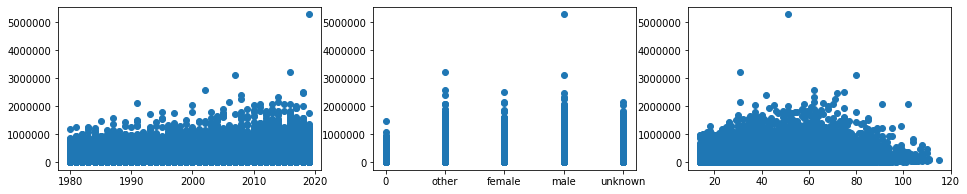

In [22]:
## Visualising

plt.figure(figsize=(16,3))

plt.subplot(131)
plt.scatter(x = Raw['Year of Record'], y = Raw['Income in EUR'])
plt.subplot(132)
plt.scatter(x = Raw['Gender'], y = Raw['Income in EUR'])
plt.subplot(133)
plt.scatter(x = Raw['Age'], y = Raw['Income in EUR'])
# plt.subplot(111)
# plt.scatter(x = Raw['Country'], y = Raw['Income in EUR'])
plt.show()

In [29]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(Raw['Income in EUR']))
print(z)
print(z.shape)
count = []
index = []
for i in range(len(z)):
    if z[i] > 2:
        count.append(z[i])
        index.append(i)
        
dropped = Raw.drop(index)

[0.32163766 0.12157727 0.32555287 ... 1.20651194 0.06119611 0.24480686]
(111993,)


(107157, 10)


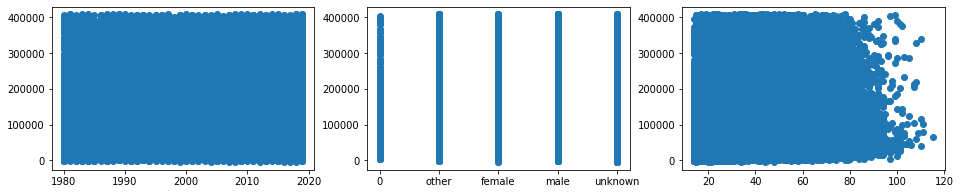

In [33]:
print(dropped.shape)
    
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.scatter(x = dropped['Year of Record'], y = dropped['Income in EUR'])
plt.subplot(132)
plt.scatter(x = dropped['Gender'], y = dropped['Income in EUR'])
plt.subplot(133)
plt.scatter(x = dropped['Age'], y = dropped['Income in EUR'])
# plt.subplot(111)
# plt.scatter(x = Raw['Country'], y = Raw['Income in EUR'])
plt.show()